In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")



CUDA available: True
Device: NVIDIA GeForce RTX 3060 Laptop GPU


Dataset


In [6]:
import os
import shutil
import random


original_dir = 'raw-img'
base_dir = 'processed-img'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Split data
split_ratios = {'train': 0.7, 'val': 0.1, 'test': 0.2}
classes = os.listdir(original_dir)

for class_name in classes:
    class_dir = os.path.join(original_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    train_cutoff = int(split_ratios['train'] * len(images))
    val_cutoff = train_cutoff + int(split_ratios['val'] * len(images))

    splits = {
        'train': images[:train_cutoff],
        'val': images[train_cutoff:val_cutoff],
        'test': images[val_cutoff:]
    }

    for split, image_list in splits.items():
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for image in image_list:
            src = os.path.join(class_dir, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)

print("Data successfully split into train, val, and test sets!")


Data successfully split into train, val, and test sets!


In [17]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder


train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'


basic_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (example: ImageNet normalization)
])


train_dataset2 = ImageFolder(root=train_dir, transform=basic_transforms)
val_dataset2 = ImageFolder(root=val_dir, transform=basic_transforms)
test_dataset2 = ImageFolder(root=test_dir, transform=basic_transforms)


train_loader2 = DataLoader(train_dataset2, batch_size=32, shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=32, shuffle=False)
test_loader2 = DataLoader(test_dataset2, batch_size=32, shuffle=False)

# Get class labels
class_labels = train_dataset2.classes  


print("Class Labels:", class_labels)


for images, labels in train_loader2:
    print("Images size:", images.size())  
    print("Labels (batch):", labels) 

    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  
    break  


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([8, 0, 3, 2, 5, 3, 7, 7, 0, 2, 1, 9, 8, 0, 1, 0, 5, 3, 8, 2, 0, 1, 3, 1,
        0, 3, 2, 3, 0, 9, 8, 7])
Label Names (batch): ['ragno', 'cane', 'farfalla', 'elefante', 'gatto', 'farfalla', 'pecora', 'pecora', 'cane', 'elefante', 'cavallo', 'scoiattolo', 'ragno', 'cane', 'cavallo', 'cane', 'gatto', 'farfalla', 'ragno', 'elefante', 'cane', 'cavallo', 'farfalla', 'cavallo', 'cane', 'farfalla', 'elefante', 'farfalla', 'cane', 'scoiattolo', 'ragno', 'pecora']


In [14]:



train_dir = 'processed-img/train'
val_dir = 'processed-img/val'
test_dir = 'processed-img/test'


train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, translate=None, scale=(0.8, 1.2), shear=None),  # Zoom via scaling
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = ImageFolder(root=test_dir, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class_labels = train_dataset.classes 

print("Class Labels:", class_labels)


for images, labels in train_loader:
    print("Images size:", images.size())  
    print("Labels (batch):", labels)  

    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  
    break 


Class Labels: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([6, 3, 7, 1, 3, 8, 0, 8, 4, 0, 2, 1, 6, 1, 1, 0, 0, 0, 4, 4, 0, 7, 4, 9,
        0, 6, 0, 0, 8, 0, 2, 0])
Label Names (batch): ['mucca', 'farfalla', 'pecora', 'cavallo', 'farfalla', 'ragno', 'cane', 'ragno', 'gallina', 'cane', 'elefante', 'cavallo', 'mucca', 'cavallo', 'cavallo', 'cane', 'cane', 'cane', 'gallina', 'gallina', 'cane', 'pecora', 'gallina', 'scoiattolo', 'cane', 'mucca', 'cane', 'cane', 'ragno', 'cane', 'elefante', 'cane']


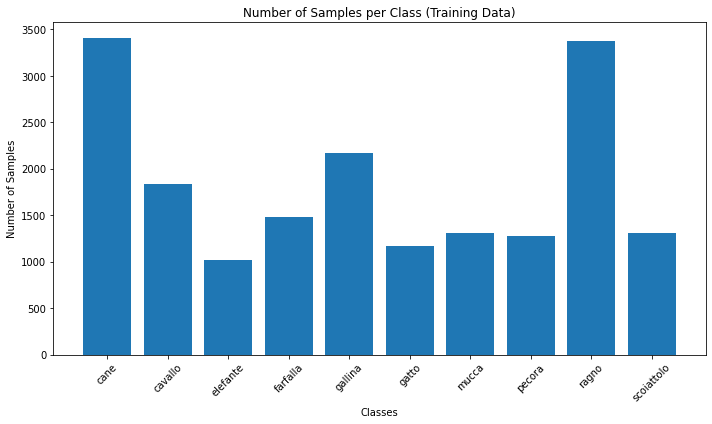

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


class_counts = Counter()

for _, labels in train_loader:
    class_counts.update(labels.numpy())  


train_class_counts = [class_counts[i] for i in range(len(class_labels))]


x = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
plt.bar(x, train_class_counts)


plt.xticks(x, class_labels, rotation=45)
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class (Training Data)")
plt.tight_layout()
plt.show()


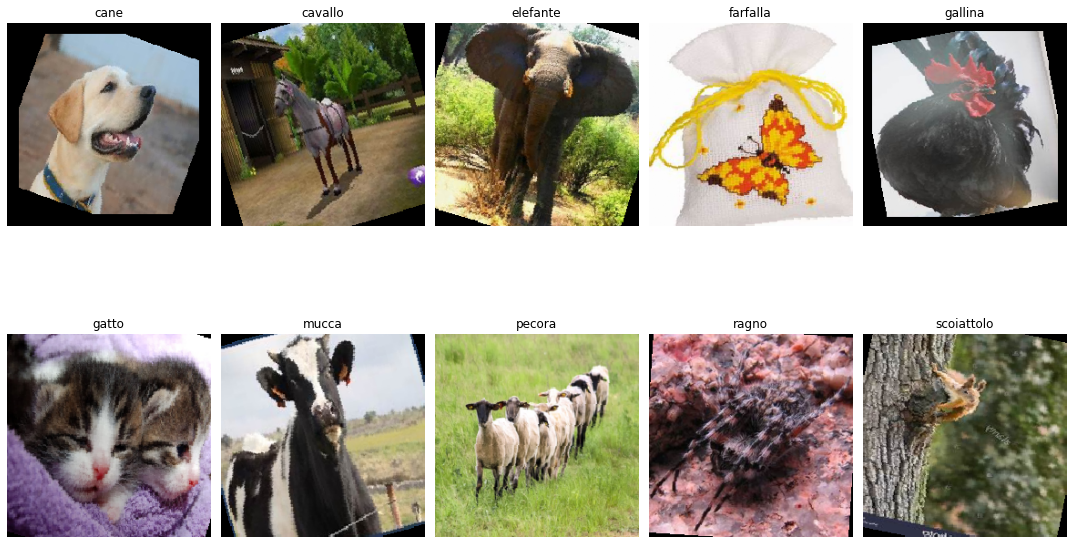

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

classes = train_dataset.classes


displayed_classes = {class_name: False for class_name in classes}


plt.figure(figsize=(15, 10))


mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])


def unnormalize(img, mean, std):

    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img


for images, labels in train_loader:

    for img, label in zip(images, labels):
        class_idx = label.item()  
        class_name = classes[class_idx]
        
     
        if not displayed_classes[class_name]:
           
            img = unnormalize(img, mean, std).permute(1, 2, 0).cpu().numpy()  

          
            plt.subplot(2, 5, list(displayed_classes.keys()).index(class_name) + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            displayed_classes[class_name] = True  

     
        if all(displayed_classes.values()):
            break
    if all(displayed_classes.values()):
        break

plt.tight_layout()
plt.show()


Phase1

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1) 
        self.fc1 = nn.Linear(256, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)
        
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)
        
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = CNNModel(num_classes=10)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveA

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F



class CNNModel2(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1) 
        self.fc1 = nn.Linear(256, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        
        x = F.relu(self.conv3(x))
        x = self.maxpool3(x)
        
        x = F.relu(self.conv4(x))
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = CNNModel2(num_classes=10)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
Total Parameters: 525130


Over_Fit


In [ ]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10 


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)


train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)


model = model.to(device)


for epoch in range(epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0


    for images, labels in train_loader:
 
        images, labels = images.to(device), labels.to(device)


        optimizer.zero_grad()


        outputs = model(images)
        loss = criterion(outputs, labels)

 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")


    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
     
            images, labels = images.to(device), labels.to(device)


            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

  
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 2.1344, Accuracy: 21.85%
Validation Loss: 1.9365, Validation Accuracy: 31.83%
Epoch [2/25], Loss: 1.7537, Accuracy: 38.23%
Validation Loss: 1.6133, Validation Accuracy: 42.31%
Epoch [3/25], Loss: 1.4600, Accuracy: 48.56%
Validation Loss: 1.3477, Validation Accuracy: 51.19%
Epoch [4/25], Loss: 1.2985, Accuracy: 54.39%
Validation Loss: 1.2531, Validation Accuracy: 55.51%
Epoch [5/25], Loss: 1.1671, Accuracy: 59.40%
Validation Loss: 1.1724, Validation Accuracy: 58.65%
Epoch [6/25], Loss: 1.0645, Accuracy: 62.98%
Validation Loss: 1.0765, Validation Accuracy: 62.43%
Epoch [7/25], Loss: 0.9816, Accuracy: 65.97%
Validation Loss: 0.9988, Validation Accuracy: 65.76%
Epoch [8/25], Loss: 0.9067, Accuracy: 68.76%
Validation Loss: 0.9782, Validation Accuracy: 65.80%
Epoch [9/25], Loss: 0.8487, Accuracy: 70.67%
Validation Loss: 0.9321, Validation Accuracy: 67.56%
Epoch [10/25], Loss: 0.7876, Accuracy: 72.75%
Validation Loss: 0.8926, Validation Accuracy: 69.20%


In [18]:

model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to over_fitted_model.pkl


In [15]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "over_fitted_model.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device) 
print("Model loaded successfully!")

Using device: cuda
Model loaded successfully!


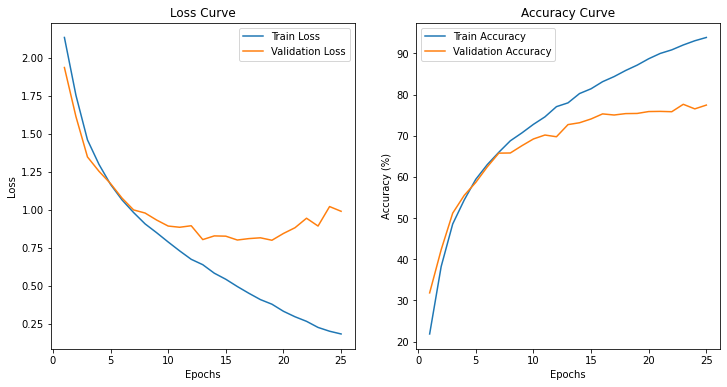

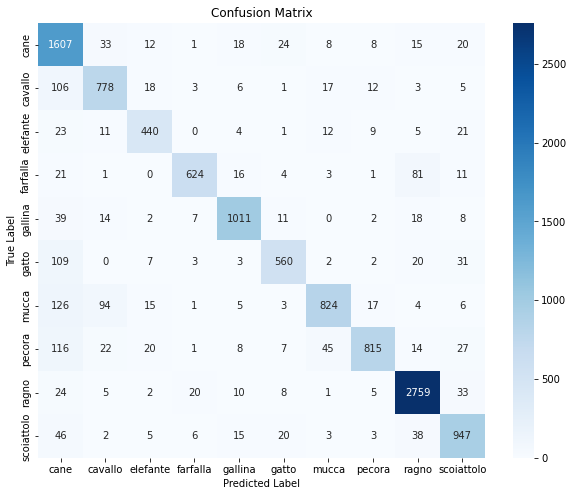

Precision: 0.8746, Recall: 0.8671, F1 Score: 0.8671
Test Accuracy: 86.71%


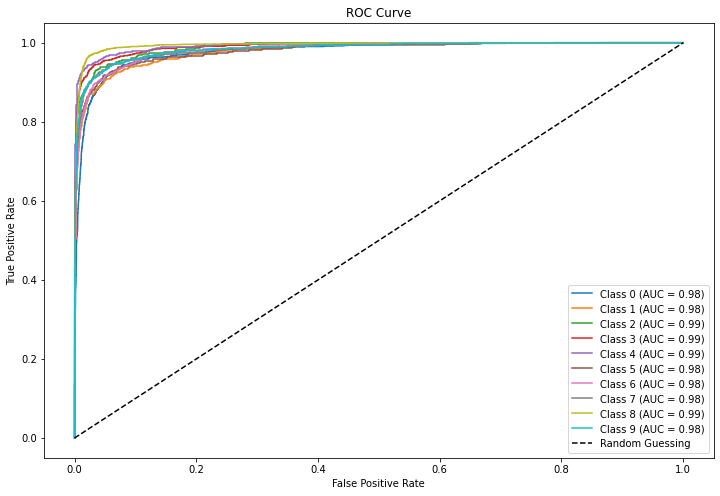

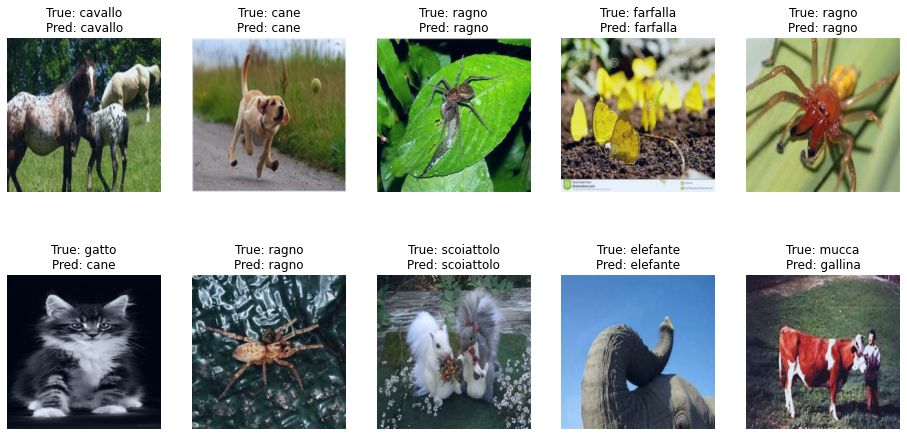

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_recall_fscore_support
)
from torch.utils.data import DataLoader
import numpy as np
model = loaded_model

train_losses = [
    2.1344, 1.7537, 1.4600, 1.2985, 1.1671, 
    1.0645, 0.9816, 0.9067, 0.8487, 0.7876, 
    0.7288, 0.6735, 0.6382, 0.5822, 0.5421, 
    0.4943, 0.4499, 0.4083, 0.3780, 0.3313, 
    0.2953, 0.2652, 0.2250, 0.2000, 0.1819
]

val_losses = [
    1.9365, 1.6133, 1.3477, 1.2531, 1.1724, 
    1.0765, 0.9988, 0.9782, 0.9321, 0.8926, 
    0.8846, 0.8946, 0.8034, 0.8277, 0.8259, 
    0.8006, 0.8099, 0.8152, 0.7991, 0.8438, 
    0.8815, 0.9441, 0.8926, 1.0209, 0.9898
]

train_accuracies = [
    21.85, 38.23, 48.56, 54.39, 59.40, 
    62.98, 65.97, 68.76, 70.67, 72.75, 
    74.57, 77.05, 77.97, 80.23, 81.39, 
    83.11, 84.35, 85.83, 87.13, 88.68, 
    89.97, 90.84, 92.03, 93.05, 93.85
]

val_accuracies = [
    31.83, 42.31, 51.19, 55.51, 58.65, 
    62.43, 65.76, 65.80, 67.56, 69.20, 
    70.16, 69.74, 72.69, 73.14, 74.06, 
    75.29, 75.02, 75.36, 75.40, 75.86, 
    75.90, 75.82, 77.62, 76.51, 77.43
]

class_names = class_labels


test_loader = DataLoader(test_dataset2, batch_size=32, shuffle=False)


def evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies):

    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label="Train Loss")
    plt.plot(epochs_range, val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
    plt.plot(epochs_range, val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.show()


def evaluate_on_test_data(model, test_loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    correct = 0 
    total = 0  

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_probs.extend(probabilities.cpu().numpy())

  
            correct += (predicted == labels).sum().item()
            total += labels.size(0)


    test_accuracy = 100 * correct / total


    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    precision, recall, f1_score, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")  


    plt.figure(figsize=(12, 8))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(
            [1 if label == i else 0 for label in y_true],
            [prob[i] for prob in y_probs]
        )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


import random

# Visualize some random test images with predictions and true labels
def visualize_predictions(model, test_loader, num_images=10):
    model.eval()


    all_images, all_labels = [], []
    for images, labels in test_loader:
        all_images.append(images)
        all_labels.append(labels)


    all_images = torch.cat(all_images)
    all_labels = torch.cat(all_labels)


    random_indices = random.sample(range(len(all_images)), min(num_images, len(all_images)))


    selected_images = all_images[random_indices]
    selected_labels = all_labels[random_indices]

    with torch.no_grad():
        outputs = model(selected_images.to(device))
        _, predictions = torch.max(outputs, 1)

    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(random_indices):
        
        img = selected_images[i].cpu().numpy()
        img = np.transpose(img, (1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(
            f"True: {class_names[selected_labels[i]]}\nPred: {class_names[predictions[i].cpu()]}"
        )
        plt.axis("off")
    plt.show()



evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)


Phase 2

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class OptimizedCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)  # Reduced channels
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)  # Reduced channels
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)  # Reduced channels
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)  # Reduced channels
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)  # Reduced size
        self.fc2 = nn.Linear(256, num_classes)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)

        x = F.relu(self.conv3(x))
        x = self.maxpool3(x)

        x = F.relu(self.conv4(x))
        x = self.maxpool4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


optimized_model = OptimizedCNNModel(num_classes=10)


print(optimized_model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(optimized_model)
print(f"Total Parameters: {total_params}")


OptimizedCNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)
Total Parameters: 133034


In [24]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  
model = optimized_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)


train_loader = DataLoader(train_dataset2, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset2, batch_size=batch_size, shuffle=False)


model = model.to(device)


for epoch in range(epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    for images, labels in train_loader:
      
        images, labels = images.to(device), labels.to(device)

       
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

       
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    
    model.eval() 
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
           
            images, labels = images.to(device), labels.to(device)

            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 2.0896, Accuracy: 24.06%
Validation Loss: 1.9105, Validation Accuracy: 30.49%
Epoch [2/25], Loss: 1.7630, Accuracy: 37.77%
Validation Loss: 1.6337, Validation Accuracy: 40.78%
Epoch [3/25], Loss: 1.5127, Accuracy: 46.50%
Validation Loss: 1.4231, Validation Accuracy: 48.85%
Epoch [4/25], Loss: 1.3688, Accuracy: 51.69%
Validation Loss: 1.3306, Validation Accuracy: 51.53%
Epoch [5/25], Loss: 1.2896, Accuracy: 55.02%
Validation Loss: 1.3047, Validation Accuracy: 53.56%
Epoch [6/25], Loss: 1.2046, Accuracy: 58.19%
Validation Loss: 1.1961, Validation Accuracy: 57.08%
Epoch [7/25], Loss: 1.1289, Accuracy: 60.71%
Validation Loss: 1.1321, Validation Accuracy: 59.53%
Epoch [8/25], Loss: 1.0645, Accuracy: 62.74%
Validation Loss: 1.1450, Validation Accuracy: 60.41%
Epoch [9/25], Loss: 1.0050, Accuracy: 64.83%
Validation Loss: 1.0591, Validation Accuracy: 62.59%
Epoch [10/25], Loss: 0.9548, Accuracy: 66.70%
Validation Loss: 0.9909, Validation Accuracy: 64.96%


In [25]:

additional_epochs = 15

for epoch in range(epochs, epochs + additional_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0

    
    for images, labels in train_loader:
       
        images, labels = images.to(device), labels.to(device)

        
        optimizer.zero_grad()

       
        outputs = model(images)
        loss = criterion(outputs, labels)

        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs + additional_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

  
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            
            images, labels = images.to(device), labels.to(device)

            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch [26/40], Loss: 0.4465, Accuracy: 84.61%
Validation Loss: 0.8425, Validation Accuracy: 74.22%
Epoch [27/40], Loss: 0.4113, Accuracy: 86.07%
Validation Loss: 0.8515, Validation Accuracy: 74.02%
Epoch [28/40], Loss: 0.3867, Accuracy: 86.71%
Validation Loss: 0.8684, Validation Accuracy: 75.44%
Epoch [29/40], Loss: 0.3684, Accuracy: 87.47%
Validation Loss: 0.9038, Validation Accuracy: 73.68%
Epoch [30/40], Loss: 0.3531, Accuracy: 87.77%
Validation Loss: 0.8514, Validation Accuracy: 74.90%
Epoch [31/40], Loss: 0.3236, Accuracy: 88.92%
Validation Loss: 0.8382, Validation Accuracy: 75.59%
Epoch [32/40], Loss: 0.3007, Accuracy: 89.74%
Validation Loss: 0.8593, Validation Accuracy: 76.43%
Epoch [33/40], Loss: 0.2934, Accuracy: 89.83%
Validation Loss: 0.8903, Validation Accuracy: 75.02%
Epoch [34/40], Loss: 0.2723, Accuracy: 90.69%
Validation Loss: 0.8580, Validation Accuracy: 77.12%
Epoch [35/40], Loss: 0.2377, Accuracy: 91.93%
Validation Loss: 0.9407, Validation Accuracy: 76.59%
Epoch [36/

In [28]:
# Save the entire model using pickle
model_save_path = "over_fitted_model_less_params.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to over_fitted_model_less_params.pkl


In [29]:
# Load the pickled model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "over_fitted_model_less_params.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  
print("Model loaded successfully!")

Using device: cuda
Model loaded successfully!


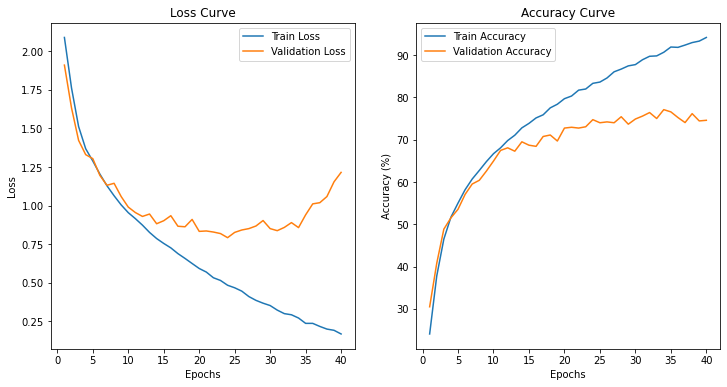

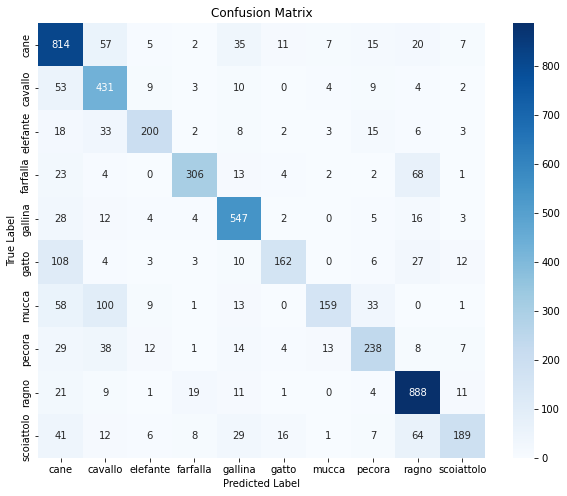

Precision: 0.7635, Recall: 0.7503, F1 Score: 0.7424
Test Accuracy: 75.03%


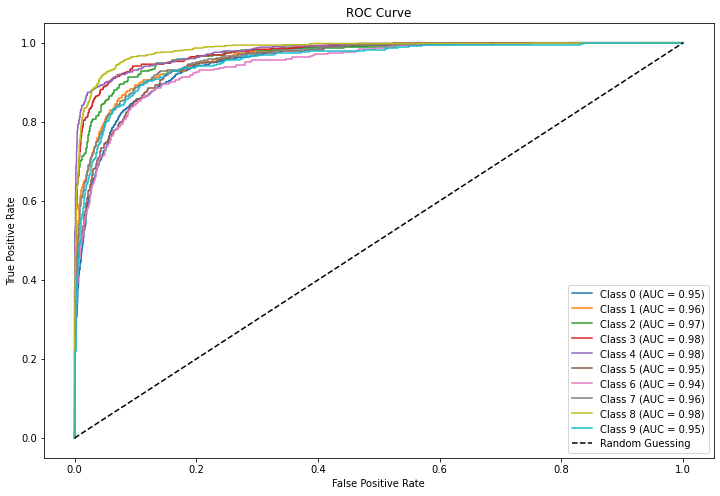

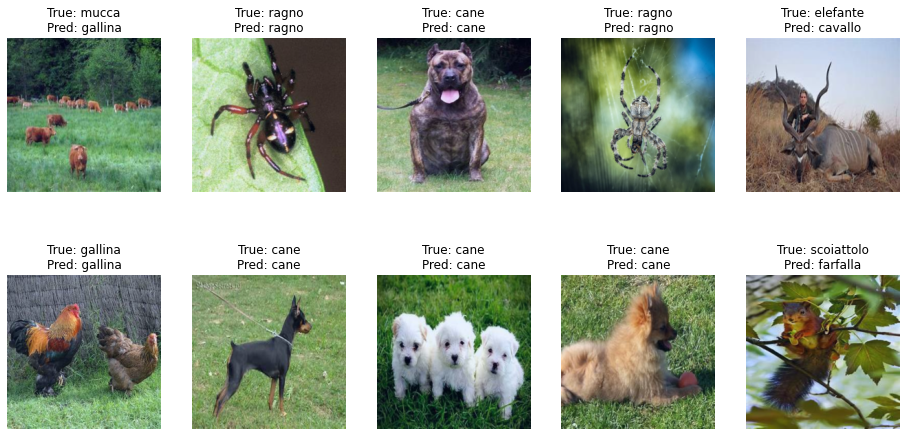

In [30]:
model = loaded_model

train_losses = [
    2.0896, 1.7630, 1.5127, 1.3688, 1.2896, 1.2046, 1.1289, 1.0645, 1.0050, 0.9548,
    0.9161, 0.8740, 0.8268, 0.7871, 0.7554, 0.7267, 0.6895, 0.6583, 0.6255, 0.5932,
    0.5701, 0.5332, 0.5157, 0.4846, 0.4682, 0.4465, 0.4113, 0.3867, 0.3684, 0.3531,
    0.3236, 0.3007, 0.2934, 0.2723, 0.2377, 0.2377, 0.2179, 0.2007, 0.1928, 0.1690
]

val_losses = [
    1.9105, 1.6337, 1.4231, 1.3306, 1.3047, 1.1961, 1.1321, 1.1450, 1.0591, 0.9909,
    0.9556, 0.9304, 0.9459, 0.8830, 0.9026, 0.9351, 0.8668, 0.8634, 0.9110, 0.8336,
    0.8362, 0.8293, 0.8194, 0.7928, 0.8270, 0.8425, 0.8515, 0.8684, 0.9038, 0.8514,
    0.8382, 0.8593, 0.8903, 0.8580, 0.9407, 1.0117, 1.0194, 1.0591, 1.1544, 1.2157
]

train_accuracies = [
    24.06, 37.77, 46.50, 51.69, 55.02, 58.19, 60.71, 62.74, 64.83, 66.70,
    68.09, 69.81, 71.07, 72.81, 73.87, 75.16, 75.90, 77.54, 78.40, 79.71,
    80.34, 81.73, 82.00, 83.34, 83.64, 84.61, 86.07, 86.71, 87.47, 87.77,
    88.92, 89.74, 89.83, 90.69, 91.93, 91.85, 92.39, 92.98, 93.33, 94.19
]

val_accuracies = [
    30.49, 40.78, 48.85, 51.53, 53.56, 57.08, 59.53, 60.41, 62.59, 64.96,
    67.48, 68.09, 67.29, 69.51, 68.71, 68.44, 70.77, 71.12, 69.70, 72.76,
    72.95, 72.76, 73.07, 74.75, 74.02, 74.22, 74.02, 75.44, 73.68, 74.90,
    75.59, 76.43, 75.02, 77.12, 76.59, 75.25, 74.06, 76.17, 74.45, 74.60
]


class_names = class_labels


test_loader = DataLoader(test_dataset2, batch_size=32, shuffle=False)

evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

Phase 3

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F



class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.batchnorm1 = nn.BatchNorm2d(32)  # Batch normalization after conv1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.batchnorm2 = nn.BatchNorm2d(64)  # Batch normalization after conv2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.batchnorm3 = nn.BatchNorm2d(128)  # Batch normalization after conv3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.batchnorm4 = nn.BatchNorm2d(256)  # Batch normalization after conv4
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(256, 512)
        self.dropout1 = nn.Dropout(0.5)  # Dropout after first fully connected layer
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.batchnorm1(self.conv1(x)))  # Batch norm before activation
        x = self.maxpool1(x)
        
        x = F.relu(self.batchnorm2(self.conv2(x)))  # Batch norm before activation
        x = self.maxpool2(x)
        
        x = F.relu(self.batchnorm3(self.conv3(x)))  # Batch norm before activation
        x = self.maxpool3(x)
        
        x = F.relu(self.batchnorm4(self.conv4(x)))  # Batch norm before activation
        x = self.maxpool4(x)
        
        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  
        x = self.fc2(x)
        return x


model = CNNModel(num_classes=10)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(model)
print(f"Total Parameters: {total_params}")


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset

torch.cuda.empty_cache()
del model

# Hyperparameters
learning_rate = 0.002
batch_size = 32
epochs = 25
num_classes = 10 
model = optimized_model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4) 


scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5, verbose=True)


accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = model.to(device)


best_val_loss = float('inf')
patience = 5
trigger_times = 0

# Training loop
for epoch in range(epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

    
    for images, labels in train_loader:
       
        images, labels = images.to(device), labels.to(device)

       
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

       
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

   
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            
            images, labels = images.to(device), labels.to(device)

           
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

           
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0  
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

   
    scheduler.step(val_loss)


Using device: cuda
Epoch [1/25], Loss: 0.6704, Accuracy: 77.14%
Validation Loss: 0.7603, Validation Accuracy: 75.71%
Epoch [2/25], Loss: 0.6428, Accuracy: 78.46%
Validation Loss: 0.7274, Validation Accuracy: 76.17%
Epoch [3/25], Loss: 0.6212, Accuracy: 79.15%
Validation Loss: 0.7494, Validation Accuracy: 75.06%
Epoch [4/25], Loss: 0.6147, Accuracy: 79.55%
Validation Loss: 0.7839, Validation Accuracy: 74.37%
Epoch [5/25], Loss: 0.6045, Accuracy: 79.52%
Validation Loss: 0.7050, Validation Accuracy: 77.31%
Epoch [6/25], Loss: 0.5956, Accuracy: 79.89%
Validation Loss: 0.6849, Validation Accuracy: 77.16%
Epoch [7/25], Loss: 0.5857, Accuracy: 80.41%
Validation Loss: 0.6766, Validation Accuracy: 77.39%
Epoch [8/25], Loss: 0.5763, Accuracy: 80.77%
Validation Loss: 0.6934, Validation Accuracy: 77.58%
Epoch [9/25], Loss: 0.5675, Accuracy: 81.01%
Validation Loss: 0.6989, Validation Accuracy: 76.59%
Epoch [10/25], Loss: 0.5682, Accuracy: 80.64%
Validation Loss: 0.7259, Validation Accuracy: 76.82%


In [40]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


learning_rate = 0.001
batch_size = 32
epochs = 25
num_classes = 10  


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


model = model.to(device)


for epoch in range(epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

  
    for images, labels in train_loader:
        
        images, labels = images.to(device), labels.to(device)

      
        optimizer.zero_grad()

       
        outputs = model(images)
        loss = criterion(outputs, labels)

       
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

    
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
           
            images, labels = images.to(device), labels.to(device)

            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

          
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Using device: cuda
Epoch [1/25], Loss: 1.8797, Accuracy: 33.50%
Validation Loss: 1.6668, Validation Accuracy: 41.43%
Epoch [2/25], Loss: 1.6027, Accuracy: 43.77%
Validation Loss: 1.5604, Validation Accuracy: 44.53%
Epoch [3/25], Loss: 1.4549, Accuracy: 49.18%
Validation Loss: 1.5633, Validation Accuracy: 46.86%
Epoch [4/25], Loss: 1.3499, Accuracy: 52.46%
Validation Loss: 1.4254, Validation Accuracy: 50.61%
Epoch [5/25], Loss: 1.2870, Accuracy: 55.03%
Validation Loss: 1.2266, Validation Accuracy: 57.73%
Epoch [6/25], Loss: 1.2214, Accuracy: 57.25%
Validation Loss: 1.0851, Validation Accuracy: 62.62%
Epoch [7/25], Loss: 1.1760, Accuracy: 59.45%
Validation Loss: 1.0824, Validation Accuracy: 61.29%
Epoch [8/25], Loss: 1.1289, Accuracy: 61.12%
Validation Loss: 1.1398, Validation Accuracy: 59.49%
Epoch [9/25], Loss: 1.0931, Accuracy: 62.41%
Validation Loss: 1.0484, Validation Accuracy: 63.39%
Epoch [10/25], Loss: 1.0660, Accuracy: 63.31%
Validation Loss: 1.1100, Validation Accuracy: 60.21%


In [38]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


# torch.cuda.empty_cache()
# del model

model = CNNModel(num_classes=10)

learning_rate = 0.005
batch_size = 64
epochs = 40
num_classes = 10 


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


model = model.to(device)


for epoch in range(epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

  
    for images, labels in train_loader:
     
        images, labels = images.to(device), labels.to(device)

       
        optimizer.zero_grad()

       
        outputs = model(images)
        loss = criterion(outputs, labels)

       
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

       
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

   
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
           
            images, labels = images.to(device), labels.to(device)

         
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

         
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Using device: cuda
Epoch [1/40], Loss: 2.0358, Accuracy: 27.16%
Validation Loss: 1.8617, Validation Accuracy: 35.50%
Epoch [2/40], Loss: 1.8447, Accuracy: 35.91%
Validation Loss: 1.7670, Validation Accuracy: 36.57%
Epoch [3/40], Loss: 1.6973, Accuracy: 40.83%
Validation Loss: 1.5121, Validation Accuracy: 46.44%
Epoch [4/40], Loss: 1.5324, Accuracy: 46.51%
Validation Loss: 1.4064, Validation Accuracy: 50.42%
Epoch [5/40], Loss: 1.4040, Accuracy: 51.55%
Validation Loss: 1.3755, Validation Accuracy: 50.84%
Epoch [6/40], Loss: 1.3136, Accuracy: 54.53%
Validation Loss: 1.3434, Validation Accuracy: 53.44%
Epoch [7/40], Loss: 1.2383, Accuracy: 57.37%
Validation Loss: 1.1597, Validation Accuracy: 59.22%
Epoch [8/40], Loss: 1.1773, Accuracy: 59.74%
Validation Loss: 1.1052, Validation Accuracy: 61.48%
Epoch [9/40], Loss: 1.1106, Accuracy: 62.42%
Validation Loss: 1.0605, Validation Accuracy: 62.09%
Epoch [10/40], Loss: 1.0776, Accuracy: 63.40%
Validation Loss: 1.0902, Validation Accuracy: 61.94%


In [39]:

model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model pickled and saved to {model_save_path}")

Model pickled and saved to fit_model_of_phase1.pkl


In [29]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device) 
print("Model loaded successfully!")
# print(loaded_model)

Using device: cuda
Model loaded successfully!


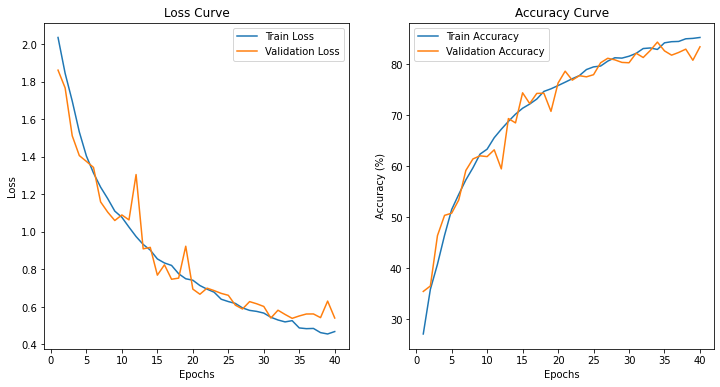

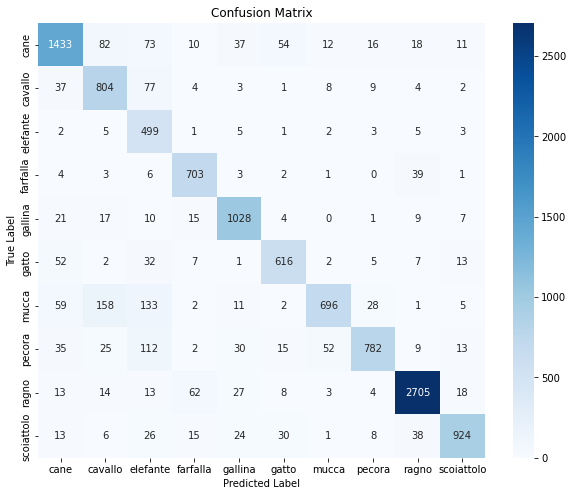

Precision: 0.8703, Recall: 0.8524, F1 Score: 0.8547
Test Accuracy: 85.24%


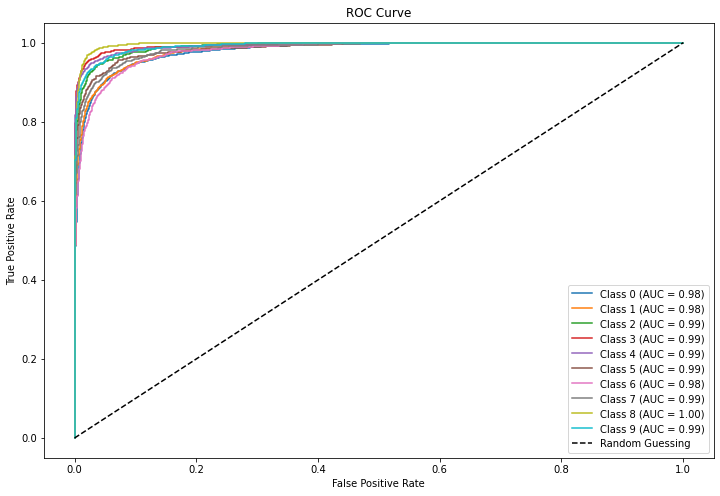

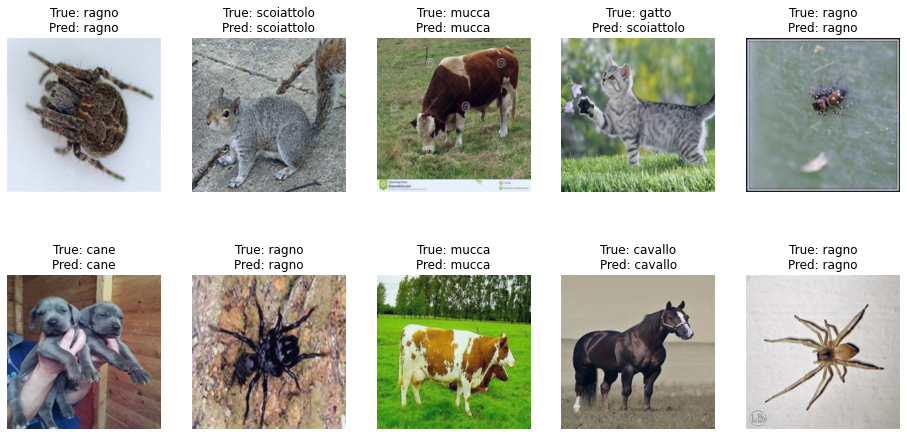

In [30]:
model = loaded_model

train_losses = [
    2.0358, 1.8447, 1.6973, 1.5324, 1.4040, 1.3136, 1.2383, 1.1773, 1.1106, 1.0776,
    1.0253, 0.9751, 0.9331, 0.9029, 0.8559, 0.8343, 0.8213, 0.7769, 0.7502, 0.7424,
    0.7140, 0.6948, 0.6787, 0.6411, 0.6287, 0.6186, 0.5949, 0.5817, 0.5763, 0.5673,
    0.5451, 0.5306, 0.5203, 0.5269, 0.4882, 0.4843, 0.4855, 0.4632, 0.4560, 0.4689
]

val_losses = [
    1.8617, 1.7670, 1.5121, 1.4064, 1.3755, 1.3434, 1.1597, 1.1052, 1.0605, 1.0902,
    1.0639, 1.3054, 0.9095, 0.9174, 0.7694, 0.8245, 0.7476, 0.7536, 0.9235, 0.6951,
    0.6677, 0.7002, 0.6871, 0.6723, 0.6620, 0.6094, 0.5891, 0.6284, 0.6169, 0.6026,
    0.5410, 0.5826, 0.5601, 0.5393, 0.5520, 0.5624, 0.5627, 0.5431, 0.6312, 0.5410
]

train_accuracies = [
    27.16, 35.91, 40.83, 46.51, 51.55, 54.53, 57.37, 59.74, 62.42, 63.40, 65.64, 67.31,
    68.84, 70.26, 71.42, 72.24, 73.22, 74.72, 75.23, 75.87, 76.53, 77.21, 77.82, 79.01,
    79.53, 79.70, 80.66, 81.32, 81.25, 81.62, 82.18, 83.13, 83.24, 82.95, 84.25, 84.47,
    84.52, 85.04, 85.12, 85.30
]

val_accuracies = [
    35.50, 36.57, 46.44, 50.42, 50.84, 53.44, 59.22, 61.48, 62.09, 61.94, 63.27, 59.53,
    69.40, 68.55, 74.45, 72.34, 74.33, 74.37, 70.81, 76.36, 78.69, 76.93, 77.81, 77.58,
    78.00, 80.34, 81.22, 80.91, 80.41, 80.34, 82.21, 81.37, 82.75, 84.39, 82.67, 81.83,
    82.36, 83.01, 80.83, 83.47
]



class_names = class_labels


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class OptimizedCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(OptimizedCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(16)  # Batch Normalization
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(32)  # Batch Normalization
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout2 = nn.Dropout(0.25)  # Dropout layer

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(64)  # Batch Normalization
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.dropout3 = nn.Dropout(0.25)  # Dropout layer

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.bn4 = nn.BatchNorm2d(128)  # Batch Normalization
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)
        self.dropout4 = nn.Dropout(0.25)  # Dropout layer

        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        self.fc1 = nn.Linear(128, 256)
        self.dropout_fc = nn.Dropout(0.5)  # Dropout for fully connected layer
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool1(x)
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.maxpool3(x)
        x = self.dropout3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool4(x)
        x = self.dropout4(x)

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)  # Dropout in the fully connected layer
        x = self.fc2(x)
        return x


optimized_model = OptimizedCNNModel(num_classes=10)


print(optimized_model)


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(optimized_model)
print(f"Total Parameters: {total_params}")


OptimizedCNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [45]:
from torchmetrics.classification import MulticlassAccuracy
from torch.utils.data import DataLoader


torch.cuda.empty_cache()


model = OptimizedCNNModel(num_classes=10)

learning_rate = 0.002
batch_size = 64
epochs = 25
num_classes = 10  


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)



accuracy_metric = MulticlassAccuracy(num_classes=num_classes).to(device)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = model.to(device)

# Training loop
for epoch in range(epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

  
    for images, labels in train_loader:
        
        images, labels = images.to(device), labels.to(device)

        
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

    
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

      
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

   
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
          
            images, labels = images.to(device), labels.to(device)

           
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

          
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Using device: cuda
Epoch [1/25], Loss: 1.9568, Accuracy: 30.32%
Validation Loss: 1.8173, Validation Accuracy: 35.50%
Epoch [2/25], Loss: 1.7565, Accuracy: 38.57%
Validation Loss: 1.9759, Validation Accuracy: 31.18%
Epoch [3/25], Loss: 1.6277, Accuracy: 42.75%
Validation Loss: 1.4380, Validation Accuracy: 48.28%
Epoch [4/25], Loss: 1.5458, Accuracy: 45.99%
Validation Loss: 2.1781, Validation Accuracy: 27.16%
Epoch [5/25], Loss: 1.4719, Accuracy: 49.14%
Validation Loss: 1.6266, Validation Accuracy: 41.58%
Epoch [6/25], Loss: 1.4162, Accuracy: 50.90%
Validation Loss: 1.9333, Validation Accuracy: 35.12%
Epoch [7/25], Loss: 1.3717, Accuracy: 52.16%
Validation Loss: 1.4703, Validation Accuracy: 51.68%
Epoch [8/25], Loss: 1.3396, Accuracy: 53.23%
Validation Loss: 1.4639, Validation Accuracy: 45.72%
Epoch [9/25], Loss: 1.2924, Accuracy: 54.82%
Validation Loss: 1.5667, Validation Accuracy: 46.56%
Epoch [10/25], Loss: 1.2701, Accuracy: 55.76%
Validation Loss: 1.6902, Validation Accuracy: 43.57%


In [46]:

additional_epochs = 35
start_epoch = epochs 
total_epochs = start_epoch + additional_epochs

for epoch in range(start_epoch, total_epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
       
        images, labels = images.to(device), labels.to(device)

       
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

       
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

      
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{total_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

 
    model.eval()  
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
          
            images, labels = images.to(device), labels.to(device)

           
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

           
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")


Epoch [26/60], Loss: 0.9991, Accuracy: 65.92%
Validation Loss: 1.6387, Validation Accuracy: 49.16%
Epoch [27/60], Loss: 0.9927, Accuracy: 66.42%
Validation Loss: 1.5637, Validation Accuracy: 51.30%
Epoch [28/60], Loss: 0.9844, Accuracy: 66.73%
Validation Loss: 1.2914, Validation Accuracy: 56.35%
Epoch [29/60], Loss: 0.9785, Accuracy: 66.89%
Validation Loss: 1.3355, Validation Accuracy: 55.47%
Epoch [30/60], Loss: 0.9626, Accuracy: 67.12%
Validation Loss: 1.1356, Validation Accuracy: 61.40%
Epoch [31/60], Loss: 0.9668, Accuracy: 67.24%
Validation Loss: 1.0122, Validation Accuracy: 64.77%
Epoch [32/60], Loss: 0.9542, Accuracy: 67.72%
Validation Loss: 0.9991, Validation Accuracy: 66.34%
Epoch [33/60], Loss: 0.9408, Accuracy: 67.92%
Validation Loss: 1.2630, Validation Accuracy: 57.46%
Epoch [34/60], Loss: 0.9416, Accuracy: 68.17%
Validation Loss: 1.2473, Validation Accuracy: 59.10%
Epoch [35/60], Loss: 0.9260, Accuracy: 68.73%
Validation Loss: 1.2188, Validation Accuracy: 59.30%
Epoch [36/

Phase 4


In [13]:
import os
import shutil
import random


original_dir = 'Dog Feelings'
base_dir = 'Dog_Feelings_processed'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)


split_ratios = {'train': 0.7, 'val': 0.1, 'test': 0.2}
classes = os.listdir(original_dir)

for class_name in classes:
    class_dir = os.path.join(original_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    train_cutoff = int(split_ratios['train'] * len(images))
    val_cutoff = train_cutoff + int(split_ratios['val'] * len(images))

    splits = {
        'train': images[:train_cutoff],
        'val': images[train_cutoff:val_cutoff],
        'test': images[val_cutoff:]
    }

    for split, image_list in splits.items():
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for image in image_list:
            src = os.path.join(class_dir, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)

print("Data successfully split into train, val, and test sets!")


Data successfully split into train, val, and test sets!


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from PIL import Image



train_dir = 'Dog_Feelings_processed/train'
val_dir = 'Dog_Feelings_processed/val'
test_dir = 'Dog_Feelings_processed/test'

train_transforms = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGBA") if img.mode == "P" else img),  # Ensure images are RGBA
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, translate=None, scale=(0.8, 1.2), shear=None),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


val_test_transforms = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGBA") if img.mode == "P" else img),  
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])




train_dataset3 = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset3 = ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset3 = ImageFolder(root=test_dir, transform=val_test_transforms)


train_loader3 = DataLoader(train_dataset3, batch_size=32, shuffle=True)
val_loader3 = DataLoader(val_dataset3, batch_size=32, shuffle=False)
test_loader3 = DataLoader(test_dataset3, batch_size=32, shuffle=False)


class_labels = train_dataset3.classes  


print("Class Labels:", class_labels)


for images, labels in train_loader:
    print("Images size:", images.size())  
    print("Labels (batch):", labels) 
  
    label_names = [class_labels[label] for label in labels]
    print("Label Names (batch):", label_names)  
    break  


Class Labels: ['dog A relaxed dog stands tall with its tail held high', 'dog Barking', 'dog Growling', 'dog Licking image', 'dog Nudging image', 'dog Perked-up ears', 'dog Soft open eyes', 'dog Whining', 'dog Yawning image', 'dog tail wags']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([7, 6, 8, 1, 8, 8, 7, 5, 6, 6, 8, 8, 4, 4, 2, 8, 3, 4, 8, 4, 5, 7, 7, 9,
        0, 7, 6, 7, 4, 0, 1, 5])
Label Names (batch): ['dog Whining', 'dog Soft open eyes', 'dog Yawning image', 'dog Barking', 'dog Yawning image', 'dog Yawning image', 'dog Whining', 'dog Perked-up ears', 'dog Soft open eyes', 'dog Soft open eyes', 'dog Yawning image', 'dog Yawning image', 'dog Nudging image', 'dog Nudging image', 'dog Growling', 'dog Yawning image', 'dog Licking image', 'dog Nudging image', 'dog Yawning image', 'dog Nudging image', 'dog Perked-up ears', 'dog Whining', 'dog Whining', 'dog tail wags', 'dog A relaxed dog stands tall with its tail held high', 'dog Whining', 'dog Soft open eyes', 

In [186]:
import pickle
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  

print("Model loaded successfully!")
print(loaded_model)

Using device: cuda
Model loaded successfully!
CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride

In [187]:
for param in loaded_model.parameters():
    param.requires_grad = False



for param in loaded_model.dropout1.parameters():
    param.requires_grad = True

for param in loaded_model.fc1.parameters():
    param.requires_grad = True

for param in loaded_model.fc2.parameters():
    param.requires_grad = True


In [188]:
import torch
import pickle
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


train_dataset = train_dataset3
val_dataset = val_dataset3
test_dataset = test_dataset3

train_loader = train_loader3
val_loader = val_loader3
test_loader = test_loader3 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, loaded_model.parameters()), lr=0.017)


num_epochs = 40
loaded_model.train()

for epoch in range(num_epochs):
   
    running_loss = 0.0
    correct_train = 0
    total_train = 0

   
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = loaded_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

   
    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100  

   
    loaded_model.eval()  
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = loaded_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

   
    val_loss /= len(val_loader)
    val_accuracy = (correct_val / total_val) * 100  

  
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

print("Training complete!")


trained_model_path = "fine_tuned_model_phase4_1.pkl"
with open(trained_model_path, 'wb') as f:
    pickle.dump(loaded_model, f)

print(f"Trained model saved at {trained_model_path}!")


Epoch 1/40
  Train Loss: 3.2022, Train Accuracy: 15.77%
  Val Loss: 2.4326, Val Accuracy: 15.00%
Epoch 2/40
  Train Loss: 2.3289, Train Accuracy: 17.98%
  Val Loss: 2.2275, Val Accuracy: 23.33%
Epoch 3/40
  Train Loss: 2.2152, Train Accuracy: 22.08%
  Val Loss: 2.1749, Val Accuracy: 26.67%
Epoch 4/40
  Train Loss: 2.1461, Train Accuracy: 22.71%
  Val Loss: 2.1178, Val Accuracy: 33.33%
Epoch 5/40
  Train Loss: 2.0727, Train Accuracy: 24.29%
  Val Loss: 2.0665, Val Accuracy: 35.00%
Epoch 6/40
  Train Loss: 2.0042, Train Accuracy: 28.39%
  Val Loss: 2.0177, Val Accuracy: 33.33%
Epoch 7/40
  Train Loss: 1.9164, Train Accuracy: 29.34%
  Val Loss: 1.9548, Val Accuracy: 36.67%
Epoch 8/40
  Train Loss: 1.8507, Train Accuracy: 31.55%
  Val Loss: 1.9101, Val Accuracy: 35.00%
Epoch 9/40
  Train Loss: 1.7913, Train Accuracy: 35.02%
  Val Loss: 1.9186, Val Accuracy: 31.67%
Epoch 10/40
  Train Loss: 1.6921, Train Accuracy: 41.32%
  Val Loss: 1.8273, Val Accuracy: 38.33%
Epoch 11/40
  Train Loss: 1.6

In [149]:
import torch
import pickle
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_dataset = train_dataset3
val_dataset = val_dataset3
test_dataset = test_dataset3

train_loader = train_loader3
val_loader = val_loader3
test_loader = test_loader3 


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, loaded_model.parameters()), lr=0.03)


num_epochs = 50
loaded_model.train()

for epoch in range(num_epochs):
   
    running_loss = 0.0
    correct_train = 0
    total_train = 0

  
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = loaded_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

   
    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100 

 
    loaded_model.eval()  
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = loaded_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

 
    val_loss /= len(val_loader)
    val_accuracy = (correct_val / total_val) * 100 


    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

print("Training complete!")


trained_model_path = "fine_tuned_model_phase3.pkl"
with open(trained_model_path, 'wb') as f:
    pickle.dump(loaded_model, f)

print(f"Trained model saved at {trained_model_path}!")


Epoch 1/50
  Train Loss: 3.0056, Train Accuracy: 13.25%
  Val Loss: 2.3577, Val Accuracy: 11.67%
Epoch 2/50
  Train Loss: 2.2754, Train Accuracy: 15.77%
  Val Loss: 2.2774, Val Accuracy: 15.00%
Epoch 3/50
  Train Loss: 2.1827, Train Accuracy: 21.45%
  Val Loss: 2.2152, Val Accuracy: 25.00%
Epoch 4/50
  Train Loss: 2.0904, Train Accuracy: 25.24%
  Val Loss: 2.0962, Val Accuracy: 26.67%
Epoch 5/50
  Train Loss: 1.9826, Train Accuracy: 31.23%
  Val Loss: 2.0544, Val Accuracy: 31.67%
Epoch 6/50
  Train Loss: 1.8791, Train Accuracy: 32.81%
  Val Loss: 1.9704, Val Accuracy: 35.00%
Epoch 7/50
  Train Loss: 1.8213, Train Accuracy: 35.65%
  Val Loss: 1.8753, Val Accuracy: 35.00%
Epoch 8/50
  Train Loss: 1.7289, Train Accuracy: 38.49%
  Val Loss: 1.8319, Val Accuracy: 41.67%
Epoch 9/50
  Train Loss: 1.6321, Train Accuracy: 45.11%
  Val Loss: 1.7553, Val Accuracy: 43.33%
Epoch 10/50
  Train Loss: 1.5717, Train Accuracy: 44.48%
  Val Loss: 1.7538, Val Accuracy: 40.00%
Epoch 11/50
  Train Loss: 1.4

Using device: cuda
Model loaded successfully!


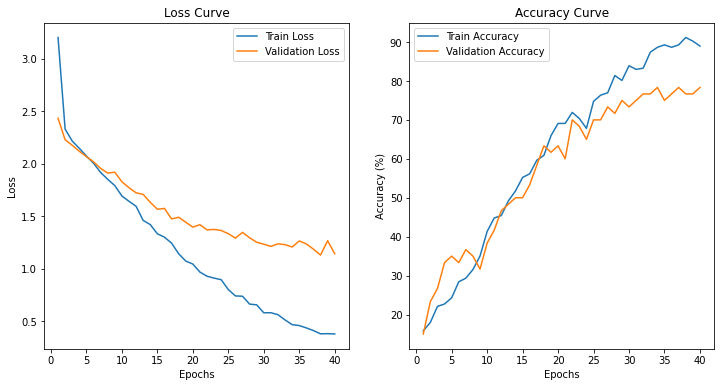

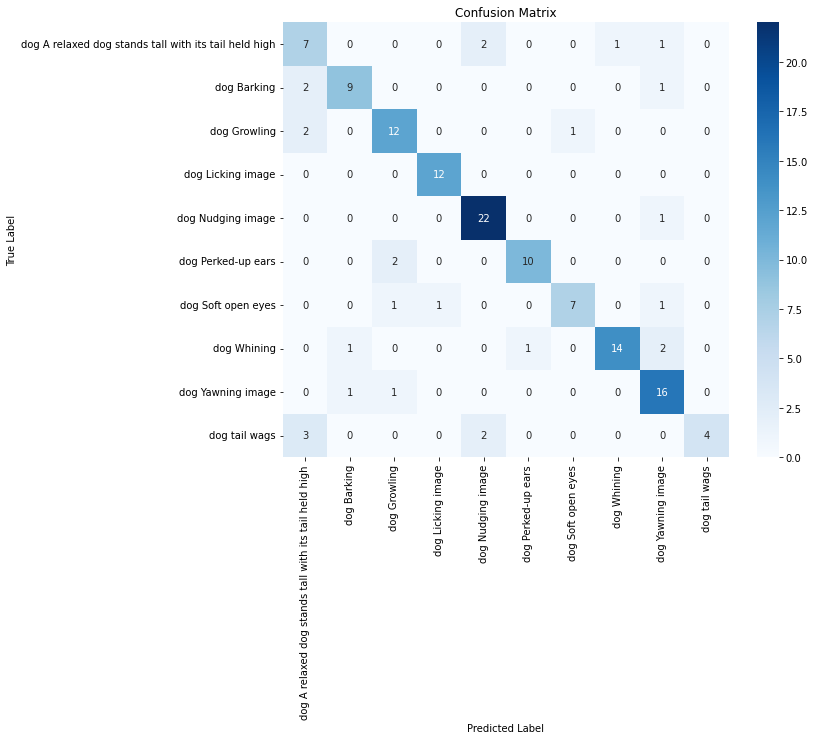

Precision: 0.8261, Recall: 0.8071, F1 Score: 0.8054
Test Accuracy: 80.71%


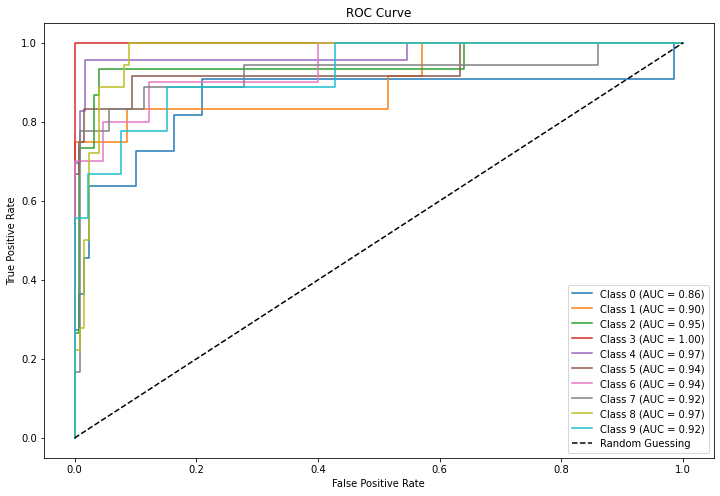

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


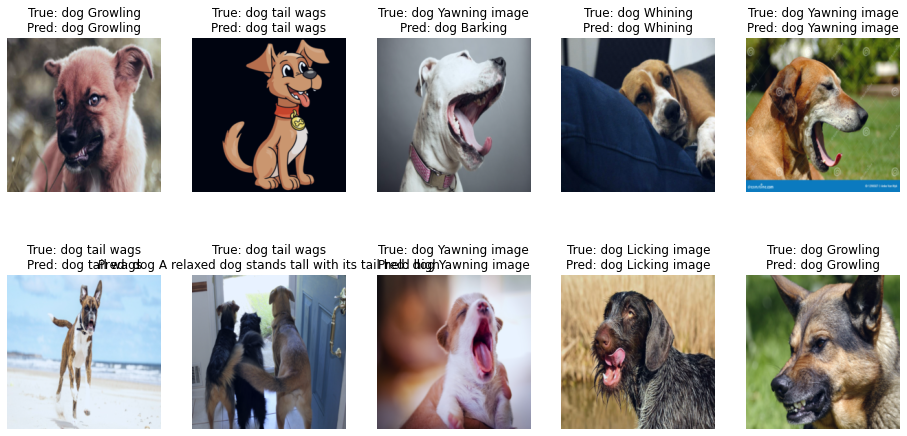

In [189]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fine_tuned_model_phase4.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  
print("Model loaded successfully!")
model = loaded_model

train_losses = [
    3.2022, 2.3289, 2.2152, 2.1461, 2.0727, 2.0042, 1.9164, 1.8507, 1.7913, 1.6921,
    1.6412, 1.5939, 1.4591, 1.4194, 1.3321, 1.2996, 1.2429, 1.1420, 1.0722, 1.0435,
    0.9669, 0.9276, 0.9095, 0.8942, 0.8004, 0.7398, 0.7369, 0.6619, 0.6548, 0.5792,
    0.5798, 0.5610, 0.5110, 0.4662, 0.4574, 0.4351, 0.4094, 0.3787, 0.3804, 0.3773
]

val_losses = [
    2.4326, 2.2275, 2.1749, 2.1178, 2.0665, 2.0177, 1.9548, 1.9101, 1.9186, 1.8273,
    1.7708, 1.7223, 1.7071, 1.6318, 1.5656, 1.5732, 1.4738, 1.4893, 1.4421, 1.3956,
    1.4182, 1.3693, 1.3732, 1.3630, 1.3325, 1.2910, 1.3453, 1.2941, 1.2508, 1.2327,
    1.2115, 1.2364, 1.2283, 1.2060, 1.2633, 1.2354, 1.1853, 1.1291, 1.2659, 1.1418
]

train_accuracies = [
    15.77, 17.98, 22.08, 22.71, 24.29, 28.39, 29.34, 31.55, 35.02, 41.32,
    44.79, 45.43, 49.21, 51.74, 55.21, 56.15, 59.62, 60.88, 65.93, 69.09,
    69.09, 71.92, 70.35, 67.82, 74.76, 76.34, 76.97, 81.39, 80.13, 83.91,
    82.97, 83.28, 87.38, 88.64, 89.27, 88.64, 89.27, 91.17, 90.22, 88.96
]

val_accuracies = [
    15.00, 23.33, 26.67, 33.33, 35.00, 33.33, 36.67, 35.00, 31.67, 38.33,
    41.67, 46.67, 48.33, 50.00, 50.00, 53.33, 58.33, 63.33, 61.67, 63.33,
    60.00, 70.00, 68.33, 65.00, 70.00, 70.00, 73.33, 71.67, 75.00, 73.33,
    75.00, 76.67, 76.67, 78.33, 75.00, 76.67, 78.33, 76.67, 76.67, 78.33
]






class_names = class_labels


test_loader = DataLoader(test_dataset3, batch_size=32, shuffle=False)

evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

In [195]:
import pickle
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  



print("Model loaded successfully!")


Using device: cuda
Model loaded successfully!


In [196]:
for param in loaded_model.parameters():
    param.requires_grad = False

# Unfreeze

for param in loaded_model.batchnorm4.parameters():
    param.requires_grad = True

for param in loaded_model.maxpool4.parameters():
    param.requires_grad = True

for param in loaded_model.conv4.parameters():
    param.requires_grad = True

for param in loaded_model.global_avg_pool.parameters():
    param.requires_grad = True

for param in loaded_model.dropout1.parameters():
    param.requires_grad = True

for param in loaded_model.fc1.parameters():
    param.requires_grad = True

for param in loaded_model.fc2.parameters():
    param.requires_grad = True



In [197]:
import torch
import pickle
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


train_dataset = train_dataset3
val_dataset = val_dataset3
test_dataset = test_dataset3

train_loader = train_loader3
val_loader = val_loader3
test_loader = test_loader3 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, loaded_model.parameters()), lr=0.012)


num_epochs = 30
loaded_model.train()

for epoch in range(num_epochs):
   
    running_loss = 0.0
    correct_train = 0
    total_train = 0

 
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = loaded_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)


    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100  

  
    loaded_model.eval() 
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = loaded_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_loss /= len(val_loader)
    val_accuracy = (correct_val / total_val) * 100 

   
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

print("Training complete!")


trained_model_path = "fine_tuned_model_phase4_2.pkl"
with open(trained_model_path, 'wb') as f:
    pickle.dump(loaded_model, f)

print(f"Trained model saved at {trained_model_path}!")


Epoch 1/30
  Train Loss: 3.0129, Train Accuracy: 14.20%
  Val Loss: 2.5030, Val Accuracy: 15.00%
Epoch 2/30
  Train Loss: 2.3477, Train Accuracy: 17.03%
  Val Loss: 2.2524, Val Accuracy: 16.67%
Epoch 3/30
  Train Loss: 2.1886, Train Accuracy: 22.08%
  Val Loss: 2.1104, Val Accuracy: 21.67%
Epoch 4/30
  Train Loss: 2.0165, Train Accuracy: 27.44%
  Val Loss: 2.0666, Val Accuracy: 30.00%
Epoch 5/30
  Train Loss: 1.9778, Train Accuracy: 27.76%
  Val Loss: 2.0585, Val Accuracy: 28.33%
Epoch 6/30
  Train Loss: 1.8779, Train Accuracy: 32.18%
  Val Loss: 1.9947, Val Accuracy: 28.33%
Epoch 7/30
  Train Loss: 1.8089, Train Accuracy: 35.96%
  Val Loss: 2.1792, Val Accuracy: 26.67%
Epoch 8/30
  Train Loss: 1.7177, Train Accuracy: 41.64%
  Val Loss: 1.9869, Val Accuracy: 33.33%
Epoch 9/30
  Train Loss: 1.6007, Train Accuracy: 45.11%
  Val Loss: 1.7047, Val Accuracy: 36.67%
Epoch 10/30
  Train Loss: 1.5020, Train Accuracy: 49.21%
  Val Loss: 1.8023, Val Accuracy: 40.00%
Epoch 11/30
  Train Loss: 1.4

Using device: cuda
Model loaded successfully!


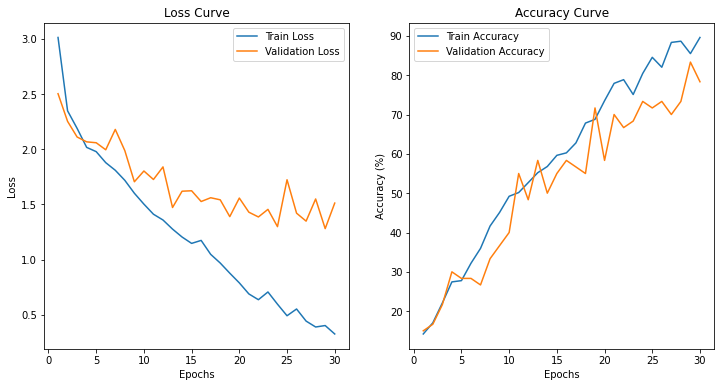

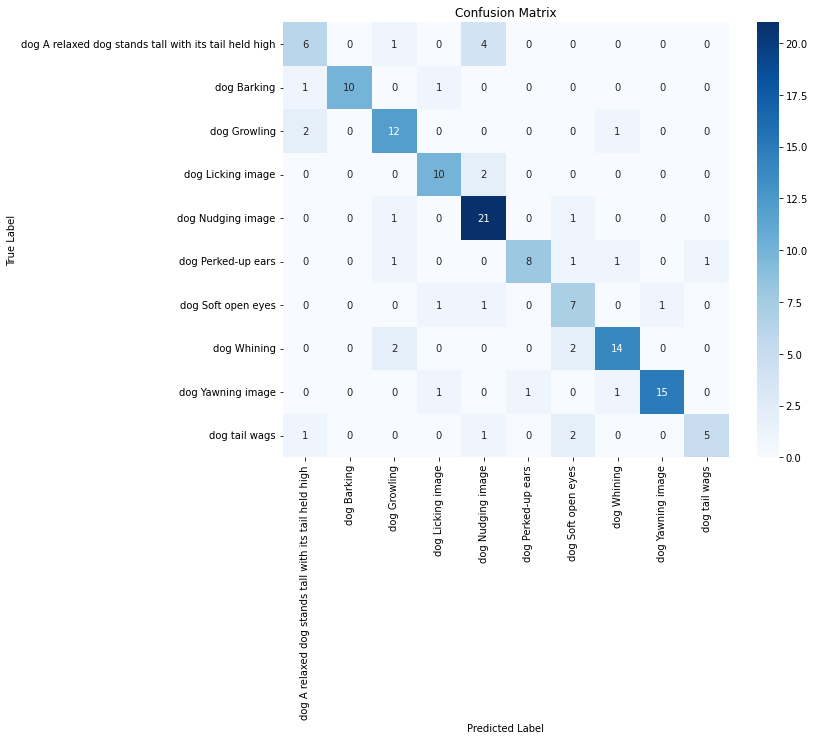

Precision: 0.7880, Recall: 0.7714, F1 Score: 0.7724
Test Accuracy: 77.14%


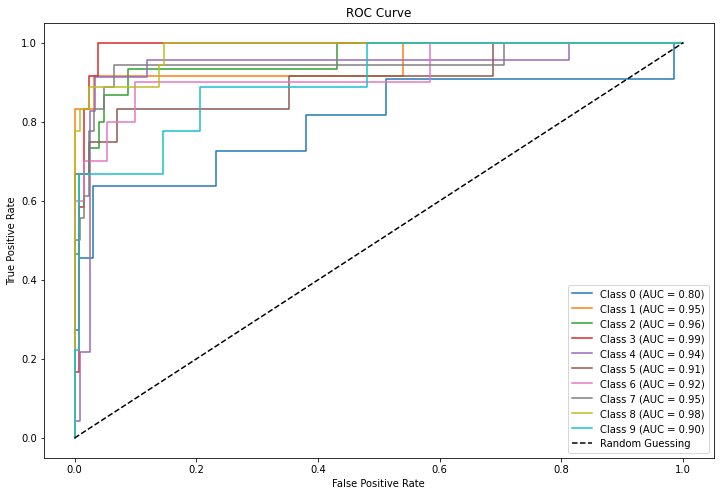

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


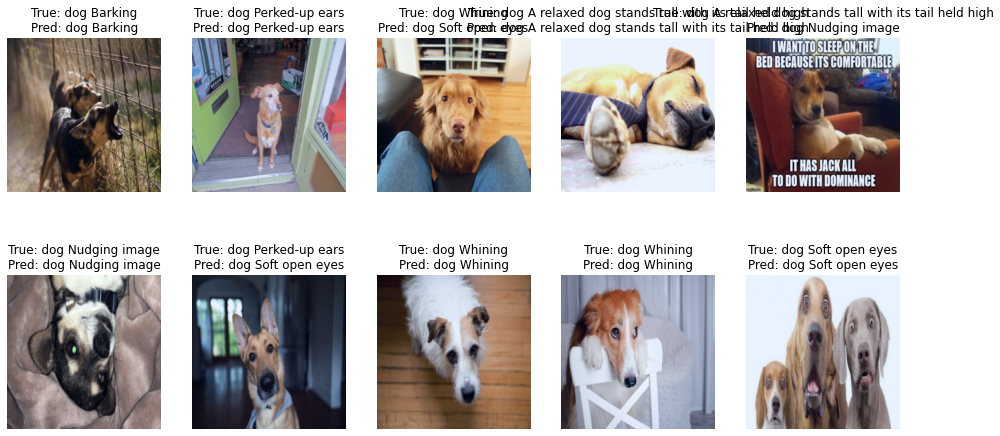

In [198]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fine_tuned_model_phase4_2.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  
print("Model loaded successfully!")
model = loaded_model

train_losses = [
    3.0129, 2.3477, 2.1886, 2.0165, 1.9778, 1.8779, 1.8089, 1.7177, 1.6007, 1.5020,
    1.4105, 1.3581, 1.2757, 1.2038, 1.1461, 1.1731, 1.0467, 0.9680, 0.8761, 0.7882,
    0.6880, 0.6356, 0.7057, 0.5950, 0.4901, 0.5513, 0.4416, 0.3882, 0.4013, 0.3249
]

val_losses = [
    2.5030, 2.2524, 2.1104, 2.0666, 2.0585, 1.9947, 2.1792, 1.9869, 1.7047, 1.8023,
    1.7254, 1.8394, 1.4714, 1.6191, 1.6232, 1.5257, 1.5600, 1.5411, 1.3886, 1.5571,
    1.4289, 1.3857, 1.4545, 1.2979, 1.7230, 1.4199, 1.3479, 1.5488, 1.2800, 1.5114
]

train_accuracies = [
    14.20, 17.03, 22.08, 27.44, 27.76, 32.18, 35.96, 41.64, 45.11, 49.21,
    50.16, 52.68, 55.21, 56.78, 59.62, 60.25, 62.78, 67.82, 68.77, 73.50,
    77.92, 78.86, 75.08, 80.44, 84.54, 82.02, 88.33, 88.64, 85.49, 89.59
]

val_accuracies = [
    15.00, 16.67, 21.67, 30.00, 28.33, 28.33, 26.67, 33.33, 36.67, 40.00,
    55.00, 48.33, 58.33, 50.00, 55.00, 58.33, 56.67, 55.00, 71.67, 58.33,
    70.00, 66.67, 68.33, 73.33, 71.67, 73.33, 70.00, 73.33, 83.33, 78.33
]






class_names = class_labels

test_loader = DataLoader(test_dataset3, batch_size=32, shuffle=False)

evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

Phase 4.2

In [202]:
import os
import shutil
import random


original_dir = 'DCH'
base_dir = 'DCH_processed'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)


split_ratios = {'train': 0.7, 'val': 0.1, 'test': 0.2}
classes = os.listdir(original_dir)

for class_name in classes:
    class_dir = os.path.join(original_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    train_cutoff = int(split_ratios['train'] * len(images))
    val_cutoff = train_cutoff + int(split_ratios['val'] * len(images))

    splits = {
        'train': images[:train_cutoff],
        'val': images[train_cutoff:val_cutoff],
        'test': images[val_cutoff:]
    }

    for split, image_list in splits.items():
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for image in image_list:
            src = os.path.join(class_dir, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)

print("Data successfully split into train, val, and test sets!")


Data successfully split into train, val, and test sets!


In [20]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from PIL import Image



train_dir = 'DCH_processed/train'
val_dir = 'DCH_processed/val'
test_dir = 'DCH_processed/test'



train_transforms = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGBA") if img.mode == "P" else img),  # Ensure images are RGBA
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomAffine(degrees=0, translate=None, scale=(0.8, 1.2), shear=None),  # Zoom via scaling
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])

# Define image transformations for validation and testing
val_test_transforms = transforms.Compose([
    transforms.Lambda(lambda img: img.convert("RGBA") if img.mode == "P" else img),  # Ensure images are RGBA
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example for ImageNet normalization
])




train_dataset4 = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset4 = ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset4 = ImageFolder(root=test_dir, transform=val_test_transforms)


train_loader4 = DataLoader(train_dataset4, batch_size=32, shuffle=True)
val_loader4 = DataLoader(val_dataset4, batch_size=32, shuffle=False)
test_loader4 = DataLoader(test_dataset4, batch_size=32, shuffle=False)

class_labels = train_dataset4.classes  

print("Class Labels:", class_labels)

for images, labels in train_loader4:
    print("Images size:", images.size())  
    print("Labels (batch):", labels)  
  
    label_names = [class_labels[label.item()] for label in labels]
    print("Label Names (batch):", label_names)  
    break 



Class Labels: ['cats', 'dogs', 'horses']
Images size: torch.Size([32, 3, 224, 224])
Labels (batch): tensor([1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2,
        1, 0, 0, 0, 1, 1, 0, 0])
Label Names (batch): ['dogs', 'dogs', 'dogs', 'cats', 'horses', 'cats', 'dogs', 'horses', 'horses', 'horses', 'dogs', 'horses', 'cats', 'horses', 'dogs', 'horses', 'horses', 'horses', 'cats', 'dogs', 'cats', 'horses', 'dogs', 'horses', 'dogs', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'cats']


In [216]:
import pickle
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fit_model_of_phase1.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  
loaded_model.fc2 = nn.Linear(512, 3).to(device)


print("Model loaded successfully!")
print(loaded_model)

Using device: cuda
Model loaded successfully!
CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_size=2, stride

In [217]:
for param in loaded_model.parameters():
    param.requires_grad = False

# Unfreeze
for param in loaded_model.dropout1.parameters():
    param.requires_grad = True

for param in loaded_model.fc1.parameters():
    param.requires_grad = True

for param in loaded_model.fc2.parameters():
    param.requires_grad = True



In [218]:
import torch
import pickle
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


train_dataset = train_dataset4
val_dataset = val_dataset4
test_dataset = test_dataset4

train_loader = train_loader4
val_loader = val_loader4
test_loader = test_loader4 


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, loaded_model.parameters()), lr=0.005)


num_epochs = 30
loaded_model.train()

for epoch in range(num_epochs):
   
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = loaded_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    
    train_loss = running_loss / len(train_loader)
    train_accuracy = (correct_train / total_train) * 100 

   
    loaded_model.eval()  
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = loaded_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    
    val_loss /= len(val_loader)
    val_accuracy = (correct_val / total_val) * 100  

   
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

print("Training complete!")


trained_model_path = "fine_tuned_model_phase4_2.pkl"
with open(trained_model_path, 'wb') as f:
    pickle.dump(loaded_model, f)

print(f"Trained model saved at {trained_model_path}!")

Epoch 1/30
  Train Loss: 0.8946, Train Accuracy: 69.16%
  Val Loss: 0.5729, Val Accuracy: 83.33%
Epoch 2/30
  Train Loss: 0.5639, Train Accuracy: 84.67%
  Val Loss: 0.3383, Val Accuracy: 92.98%
Epoch 3/30
  Train Loss: 0.3961, Train Accuracy: 86.31%
  Val Loss: 0.2579, Val Accuracy: 92.11%
Epoch 4/30
  Train Loss: 0.3863, Train Accuracy: 86.86%
  Val Loss: 0.2190, Val Accuracy: 92.98%
Epoch 5/30
  Train Loss: 0.3133, Train Accuracy: 88.69%
  Val Loss: 0.2174, Val Accuracy: 87.72%
Epoch 6/30
  Train Loss: 0.2991, Train Accuracy: 89.05%
  Val Loss: 0.1802, Val Accuracy: 94.74%
Epoch 7/30
  Train Loss: 0.2596, Train Accuracy: 90.51%
  Val Loss: 0.1628, Val Accuracy: 92.98%
Epoch 8/30
  Train Loss: 0.2404, Train Accuracy: 91.79%
  Val Loss: 0.1571, Val Accuracy: 93.86%
Epoch 9/30
  Train Loss: 0.2154, Train Accuracy: 92.70%
  Val Loss: 0.1411, Val Accuracy: 96.49%
Epoch 10/30
  Train Loss: 0.1928, Train Accuracy: 93.25%
  Val Loss: 0.1298, Val Accuracy: 97.37%
Epoch 11/30
  Train Loss: 0.2

Using device: cuda
Model loaded successfully!


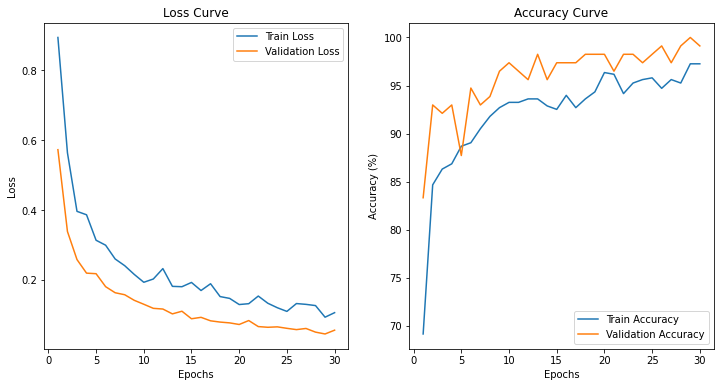

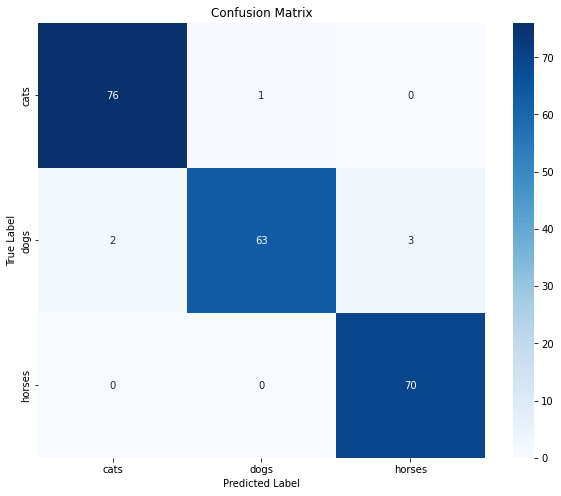

Precision: 0.9725, Recall: 0.9721, F1 Score: 0.9719
Test Accuracy: 97.21%


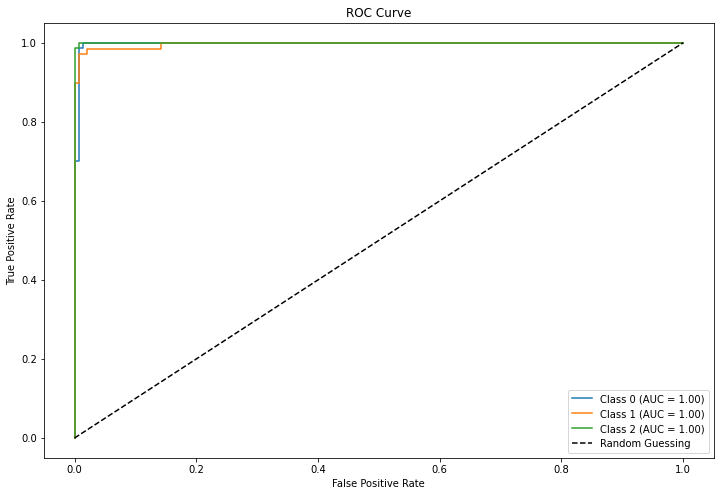

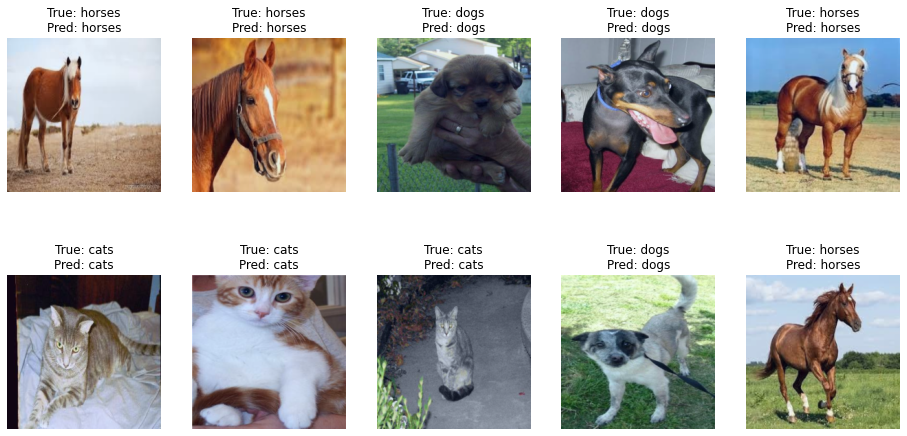

In [21]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model_save_path = "fine_tuned_model_phase4_2.pkl"
with open(model_save_path, 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model = loaded_model.to(device)  
print("Model loaded successfully!")
model = loaded_model

train_losses = [
    0.8946, 0.5639, 0.3961, 0.3863, 0.3133, 0.2991, 0.2596, 0.2404, 0.2154, 0.1928,
    0.2022, 0.2320, 0.1811, 0.1801, 0.1923, 0.1692, 0.1886, 0.1518, 0.1466, 0.1290,
    0.1314, 0.1533, 0.1327, 0.1198, 0.1093, 0.1318, 0.1295, 0.1260, 0.0927, 0.1057
]

val_losses = [
    0.5729, 0.3383, 0.2579, 0.2190, 0.2174, 0.1802, 0.1628, 0.1571, 0.1411, 0.1298,
    0.1181, 0.1161, 0.1022, 0.1098, 0.0882, 0.0923, 0.0823, 0.0787, 0.0764, 0.0718,
    0.0831, 0.0658, 0.0638, 0.0650, 0.0608, 0.0571, 0.0604, 0.0499, 0.0446, 0.0555
]

train_accuracies = [
    69.16, 84.67, 86.31, 86.86, 88.69, 89.05, 90.51, 91.79, 92.70, 93.25,
    93.25, 93.61, 93.61, 92.88, 92.52, 93.98, 92.70, 93.61, 94.34, 96.35,
    96.17, 94.16, 95.26, 95.62, 95.80, 94.71, 95.62, 95.26, 97.26, 97.26
]

val_accuracies = [
    83.33, 92.98, 92.11, 92.98, 87.72, 94.74, 92.98, 93.86, 96.49, 97.37,
    96.49, 95.61, 98.25, 95.61, 97.37, 97.37, 97.37, 98.25, 98.25, 98.25,
    96.49, 98.25, 98.25, 97.37, 98.25, 99.12, 97.37, 99.12, 100.00, 99.12
]






class_names = class_labels

# Test DataLoader
test_loader = test_loader4 
# Call the functions
evaluate_and_plot_metrics(model, train_losses, val_losses, train_accuracies, val_accuracies)
evaluate_on_test_data(model, test_loader)
visualize_predictions(model, test_loader)

Pretrained Model

In [221]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import pickle


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

models_to_train = {
    "ResNet50": models.resnet50(pretrained=True),
    "MobileNetV2": models.mobilenet_v2(pretrained=True),
    "EfficientNetB0": models.efficientnet_b0(pretrained=True),
}


def modify_model(model, num_classes):
    if isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.MobileNetV2):
        model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    elif isinstance(model, models.EfficientNet):
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model


num_classes = len(class_labels)
for model_name in models_to_train:
    models_to_train[model_name] = modify_model(models_to_train[model_name], num_classes)
    models_to_train[model_name].to(device)


num_epochs = 10
batch_size = 32
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()


results = {}

for model_name, model in models_to_train.items():
    print(f"\nTraining {model_name}...")
    
   
    for param in model.parameters():
        param.requires_grad = False
    for param in list(model.parameters())[-10:]:
        param.requires_grad = True

    
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

    
    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
        
        model.train()
        train_loss, train_correct = 0.0, 0
        for images, labels in train_loader4:
            images, labels = images.to(device), labels.to(device)

            
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

          
            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()

        train_loss /= len(train_loader4.dataset)
        train_accuracy = 100.0 * train_correct / len(train_loader4.dataset)

      
        model.eval()
        val_loss, val_correct = 0.0, 0
        with torch.no_grad():
            for images, labels in val_loader4:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()

        val_loss /= len(val_loader4.dataset)
        val_accuracy = 100.0 * val_correct / len(val_loader4.dataset)

        # Save the best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            with open(f"{model_name}_best.pkl", "wb") as f:
                pickle.dump(model, f)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    results[model_name] = best_val_accuracy

# Print final results
print("\nFinal Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Best Validation Accuracy = {accuracy:.2f}%")


Training ResNet50...
Epoch [1/10] - Train Loss: 0.2399, Train Acc: 88.69% - Val Loss: 0.1160, Val Acc: 96.49%
Epoch [2/10] - Train Loss: 0.1397, Train Acc: 95.26% - Val Loss: 0.0209, Val Acc: 99.12%
Epoch [3/10] - Train Loss: 0.1089, Train Acc: 96.35% - Val Loss: 0.0489, Val Acc: 98.25%
Epoch [4/10] - Train Loss: 0.0664, Train Acc: 97.81% - Val Loss: 0.0081, Val Acc: 100.00%
Epoch [5/10] - Train Loss: 0.0889, Train Acc: 97.81% - Val Loss: 0.0083, Val Acc: 100.00%
Epoch [6/10] - Train Loss: 0.0621, Train Acc: 97.99% - Val Loss: 0.0200, Val Acc: 99.12%
Epoch [7/10] - Train Loss: 0.0295, Train Acc: 98.91% - Val Loss: 0.0093, Val Acc: 100.00%
Epoch [8/10] - Train Loss: 0.0339, Train Acc: 98.54% - Val Loss: 0.0034, Val Acc: 100.00%
Epoch [9/10] - Train Loss: 0.0551, Train Acc: 97.99% - Val Loss: 0.0311, Val Acc: 98.25%
Epoch [10/10] - Train Loss: 0.0475, Train Acc: 98.18% - Val Loss: 0.0079, Val Acc: 100.00%

Training MobileNetV2...
Epoch [1/10] - Train Loss: 0.2810, Train Acc: 87.96% - Va


Evaluating ResNet50...


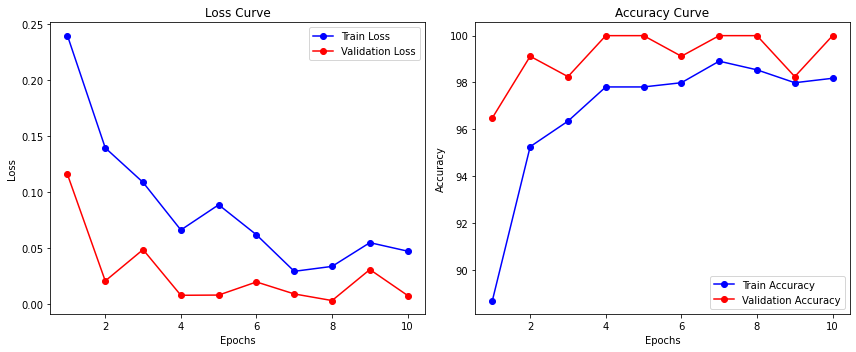


Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      0.94      0.97        77
      Class2       0.91      1.00      0.95        68
      Class3       1.00      0.97      0.99        70

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



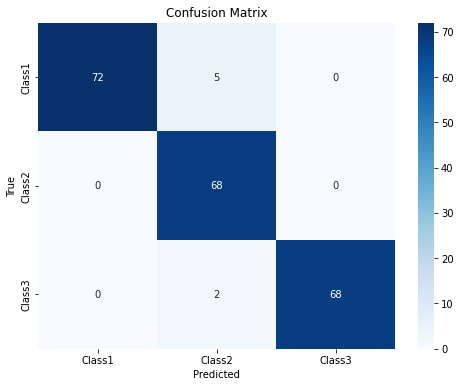

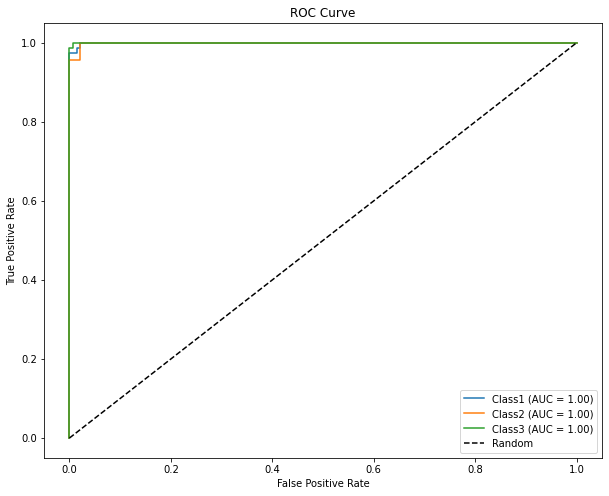

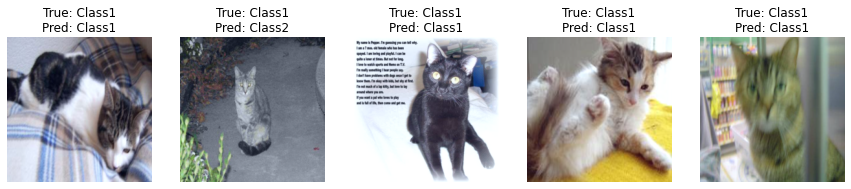


Evaluating MobileNetV2...


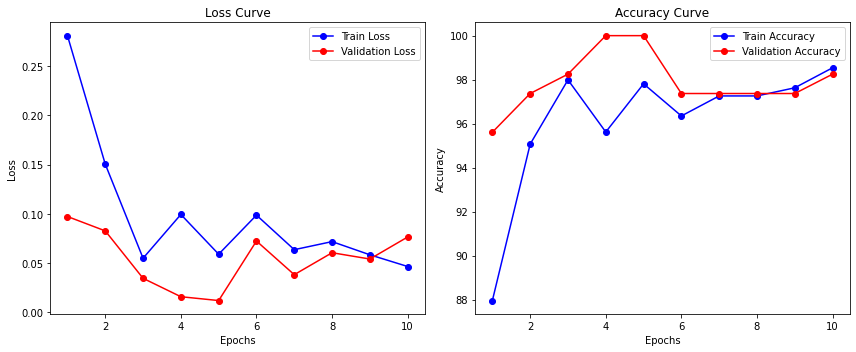


Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      0.99      0.99        77
      Class2       0.99      0.99      0.99        68
      Class3       0.97      0.99      0.98        70

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



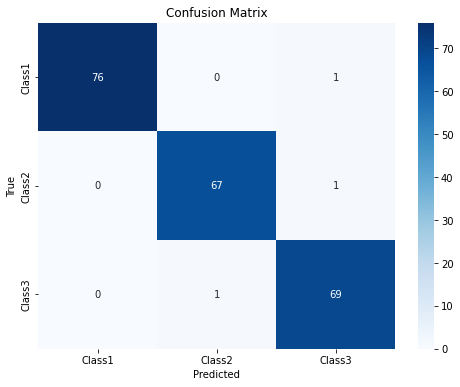

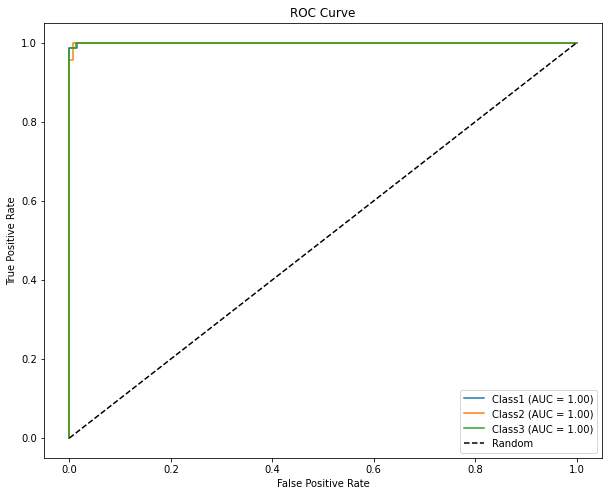

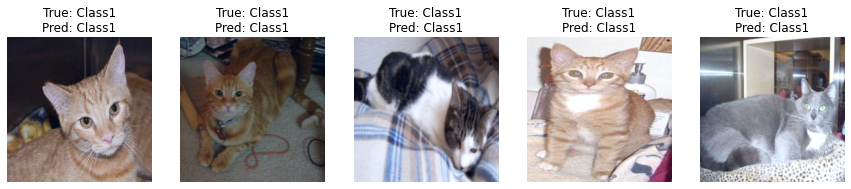


Evaluating EfficientNetB0...


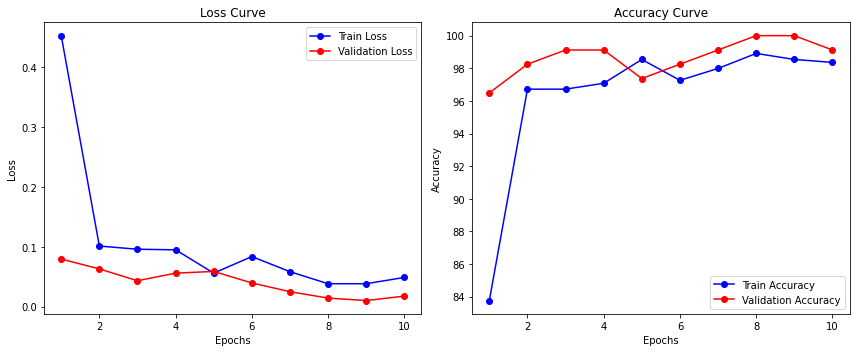


Classification Report:
              precision    recall  f1-score   support

      Class1       1.00      0.97      0.99        77
      Class2       0.96      1.00      0.98        68
      Class3       1.00      0.99      0.99        70

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215



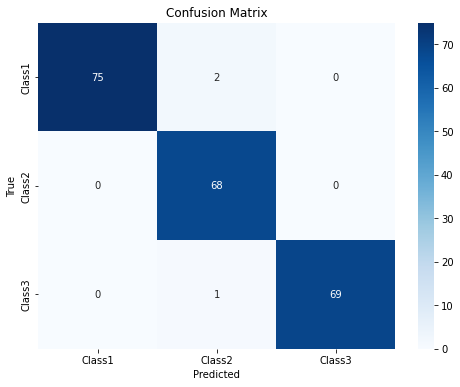

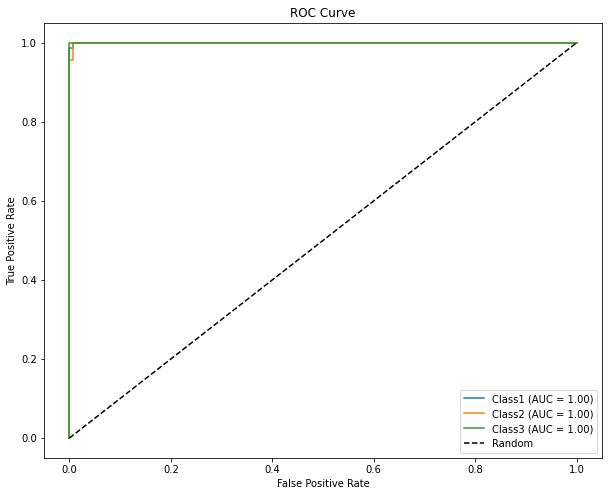

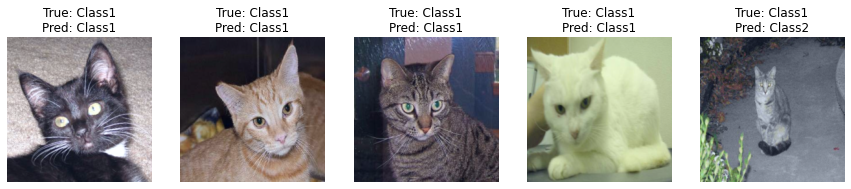

In [231]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import pickle
import torch


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


train_lossesResNet50 = [0.2399, 0.1397, 0.1089, 0.0664, 0.0889, 0.0621, 0.0295, 0.0339, 0.0551, 0.0475]
val_lossesResNet50 = [0.1160, 0.0209, 0.0489, 0.0081, 0.0083, 0.0200, 0.0093, 0.0034, 0.0311, 0.0079]
train_accuraciesResNet50 = [88.69, 95.26, 96.35, 97.81, 97.81, 97.99, 98.91, 98.54, 97.99, 98.18]
val_accuraciesResNet50 = [96.49, 99.12, 98.25, 100.00, 100.00, 99.12, 100.00, 100.00, 98.25, 100.00]

train_lossesMobileNetV2 = [0.2810, 0.1504, 0.0548, 0.0993, 0.0589, 0.0986, 0.0635, 0.0717, 0.0583, 0.0464]
val_lossesMobileNetV2 = [0.0972, 0.0826, 0.0344, 0.0157, 0.0118, 0.0723, 0.0381, 0.0604, 0.0540, 0.0764]
train_accuraciesMobileNetV2 = [87.96, 95.07, 97.99, 95.62, 97.81, 96.35, 97.26, 97.26, 97.63, 98.54]
val_accuraciesMobileNetV2 = [95.61, 97.37, 98.25, 100.00, 100.00, 97.37, 97.37, 97.37, 97.37, 98.25]

train_lossesEfficientNetB0 = [0.4525, 0.1012, 0.0959, 0.0949, 0.0560, 0.0837, 0.0584, 0.0383, 0.0383, 0.0488]
val_lossesEfficientNetB0 = [0.0795, 0.0630, 0.0433, 0.0560, 0.0588, 0.0396, 0.0250, 0.0143, 0.0102, 0.0176]
train_accuraciesEfficientNetB0 = [83.76, 96.72, 96.72, 97.08, 98.54, 97.26, 97.99, 98.91, 98.54, 98.36]
val_accuraciesEfficientNetB0 = [96.49, 98.25, 99.12, 99.12, 97.37, 98.25, 99.12, 100.00, 100.00, 99.12]


def plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Train Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Train Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluation functions
def evaluate_model(model, test_loader, class_labels):
    model.eval()
    true_labels = []
    pred_labels = []
    pred_probs = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(probs, 1)

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(preds.cpu().numpy())
            pred_probs.extend(probs.cpu().numpy())

    return true_labels, pred_labels, pred_probs

def plot_confusion_matrix(true_labels, pred_labels, class_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

def plot_roc_curve(true_labels, pred_probs, class_labels):
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_labels):
        fpr, tpr, _ = roc_curve([1 if label == i else 0 for label in true_labels], [prob[i] for prob in pred_probs])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Model names and training data
data_per_model = {
    "ResNet50": (train_lossesResNet50, val_lossesResNet50, train_accuraciesResNet50, val_accuraciesResNet50),
    "MobileNetV2": (train_lossesMobileNetV2, val_lossesMobileNetV2, train_accuraciesMobileNetV2, val_accuraciesMobileNetV2),
    "EfficientNetB0": (train_lossesEfficientNetB0, val_lossesEfficientNetB0, train_accuraciesEfficientNetB0, val_accuraciesEfficientNetB0)
}

models_to_train = ["ResNet50", "MobileNetV2", "EfficientNetB0"]
class_labels = ["Class1", "Class2", "Class3"]  

def visualize_predictions(model, test_loader, class_labels):
# Visualize test predictions with random selection
    test_iter = iter(test_loader4)
    images, labels = next(test_iter)
    images, labels = images.to(device), labels.to(device)

   
    random_indices = torch.randperm(images.size(0))

  
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        idx = random_indices[i]
        img = images[idx].cpu().permute(1, 2, 0).numpy()
        img = (img * 0.229 + 0.485).clip(0, 1) 
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True: {class_labels[labels[idx]]}\nPred: {class_labels[preds[idx]]}")

    plt.show()


for model_name in models_to_train:
    print(f"\nEvaluating {model_name}...")
    
    
    with open(f"{model_name}_best.pkl", "rb") as f:
        best_model = pickle.load(f)

    # Evaluate
    true_labels, pred_labels, pred_probs = evaluate_model(best_model, test_loader4, class_labels)

    # Plot learning curves
    train_losses, val_losses, train_accuracies, val_accuracies = data_per_model[model_name]
    plot_learning_curves(train_losses, val_losses, train_accuracies, val_accuracies)

    # Classification metrics
    print("\nClassification Report:")
    print(classification_report(true_labels, pred_labels, target_names=class_labels))

    # Confusion Matrix
    plot_confusion_matrix(true_labels, pred_labels, class_labels)

    # ROC Curve
    plot_roc_curve(true_labels, pred_probs, class_labels)

    # Visualize test predictions
    visualize_predictions(best_model, test_loader4, class_labels)


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import pickle

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


models_to_train = {
    "ResNet50": models.resnet50(pretrained=True),
    "MobileNetV2": models.mobilenet_v2(pretrained=True),
    "EfficientNetB0": models.efficientnet_b0(pretrained=True),
}


def modify_model(model, num_classes):
    if isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.MobileNetV2):
        model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    elif isinstance(model, models.EfficientNet):
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model


num_classes = len(class_labels)
for model_name in models_to_train:
    models_to_train[model_name] = modify_model(models_to_train[model_name], num_classes)
    models_to_train[model_name].to(device)


num_epochs = 10
batch_size = 16
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()


results = {}

for model_name, model in models_to_train.items():
    print(f"\nTraining {model_name}...")
    

    for param in model.parameters():
        param.requires_grad = False
    for param in list(model.parameters())[-10:]:
        param.requires_grad = True


    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
      
        model.train()
        train_loss, train_correct = 0.0, 0
        for images, labels in train_loader4:
            images, labels = images.to(device), labels.to(device)

        
            outputs = model(images)
            loss = criterion(outputs, labels)

       
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

      
            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()

        train_loss /= len(train_loader4.dataset)
        train_accuracy = 100.0 * train_correct / len(train_loader4.dataset)

     
        model.eval()
        val_loss, val_correct = 0.0, 0
        with torch.no_grad():
            for images, labels in val_loader4:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()

        val_loss /= len(val_loader4.dataset)
        val_accuracy = 100.0 * val_correct / len(val_loader4.dataset)

        # # Save the best model
        # if val_accuracy > best_val_accuracy:
        #     best_val_accuracy = val_accuracy
        #     with open(f"{model_name}_best.pkl", "wb") as f:
        #         pickle.dump(model, f)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    results[model_name] = best_val_accuracy

# Print final results
print("\nFinal Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Best Validation Accuracy = {accuracy:.2f}%")

c:\Program Files\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Program Files\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get t


Training ResNet50...
Epoch [1/10] - Train Loss: 0.4333, Train Acc: 85.22% - Val Loss: 0.0608, Val Acc: 99.12%
Epoch [2/10] - Train Loss: 0.2713, Train Acc: 93.98% - Val Loss: 0.0283, Val Acc: 98.25%
Epoch [3/10] - Train Loss: 0.2102, Train Acc: 95.44% - Val Loss: 0.2055, Val Acc: 97.37%
Epoch [4/10] - Train Loss: 0.1861, Train Acc: 94.89% - Val Loss: 0.1324, Val Acc: 96.49%
Epoch [5/10] - Train Loss: 0.3889, Train Acc: 93.25% - Val Loss: 0.4621, Val Acc: 91.23%
Epoch [6/10] - Train Loss: 0.3181, Train Acc: 94.34% - Val Loss: 0.0245, Val Acc: 98.25%
Epoch [7/10] - Train Loss: 0.0836, Train Acc: 97.81% - Val Loss: 0.0038, Val Acc: 100.00%
Epoch [8/10] - Train Loss: 0.0391, Train Acc: 98.54% - Val Loss: 0.0371, Val Acc: 98.25%
Epoch [9/10] - Train Loss: 0.1004, Train Acc: 98.36% - Val Loss: 0.0568, Val Acc: 99.12%
Epoch [10/10] - Train Loss: 0.2539, Train Acc: 94.71% - Val Loss: 0.1204, Val Acc: 99.12%

Training MobileNetV2...
Epoch [1/10] - Train Loss: 0.5573, Train Acc: 84.49% - Val Lo

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import pickle


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

models_to_train = {
    "ResNet50": models.resnet50(pretrained=True),
    "MobileNetV2": models.mobilenet_v2(pretrained=True),
    "EfficientNetB0": models.efficientnet_b0(pretrained=True),
}


def modify_model(model, num_classes):
    if isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.MobileNetV2):
        model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    elif isinstance(model, models.EfficientNet):
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model


num_classes = len(class_labels)
for model_name in models_to_train:
    models_to_train[model_name] = modify_model(models_to_train[model_name], num_classes)
    models_to_train[model_name].to(device)


num_epochs = 10
batch_size = 64
learning_rate = 0.0001
criterion = nn.CrossEntropyLoss()


results = {}

for model_name, model in models_to_train.items():
    print(f"\nTraining {model_name}...")
    
   
    for param in model.parameters():
        param.requires_grad = False
    for param in list(model.parameters())[-10:]:
        param.requires_grad = True

 
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

 
    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
    
        model.train()
        train_loss, train_correct = 0.0, 0
        for images, labels in train_loader4:
            images, labels = images.to(device), labels.to(device)

        
            outputs = model(images)
            loss = criterion(outputs, labels)

      
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

   
            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()

        train_loss /= len(train_loader4.dataset)
        train_accuracy = 100.0 * train_correct / len(train_loader4.dataset)


        model.eval()
        val_loss, val_correct = 0.0, 0
        with torch.no_grad():
            for images, labels in val_loader4:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()

        val_loss /= len(val_loader4.dataset)
        val_accuracy = 100.0 * val_correct / len(val_loader4.dataset)

        # # Save the best model
        # if val_accuracy > best_val_accuracy:
        #     best_val_accuracy = val_accuracy
        #     with open(f"{model_name}_best.pkl", "wb") as f:
        #         pickle.dump(model, f)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% - Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    results[model_name] = best_val_accuracy


print("\nFinal Results:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Best Validation Accuracy = {accuracy:.2f}%")


Training ResNet50...
Epoch [1/10] - Train Loss: 0.5089, Train Acc: 87.77% - Val Loss: 0.1761, Val Acc: 95.61%
Epoch [2/10] - Train Loss: 0.1215, Train Acc: 97.81% - Val Loss: 0.0617, Val Acc: 98.25%
Epoch [3/10] - Train Loss: 0.0836, Train Acc: 98.54% - Val Loss: 0.0575, Val Acc: 97.37%
Epoch [4/10] - Train Loss: 0.0649, Train Acc: 98.18% - Val Loss: 0.0518, Val Acc: 99.12%
Epoch [5/10] - Train Loss: 0.0582, Train Acc: 98.91% - Val Loss: 0.0336, Val Acc: 99.12%
Epoch [6/10] - Train Loss: 0.0524, Train Acc: 98.91% - Val Loss: 0.0303, Val Acc: 99.12%
Epoch [7/10] - Train Loss: 0.0366, Train Acc: 98.72% - Val Loss: 0.0239, Val Acc: 99.12%
Epoch [8/10] - Train Loss: 0.0347, Train Acc: 99.45% - Val Loss: 0.0238, Val Acc: 99.12%
Epoch [9/10] - Train Loss: 0.0412, Train Acc: 98.72% - Val Loss: 0.0199, Val Acc: 100.00%
Epoch [10/10] - Train Loss: 0.0214, Train Acc: 99.64% - Val Loss: 0.0157, Val Acc: 100.00%

Training MobileNetV2...
Epoch [1/10] - Train Loss: 0.6748, Train Acc: 76.46% - Val L